<a href="https://colab.research.google.com/github/matheusvazdata/ml-classificacao-analise-de-inadimplencia/blob/main/Projeto_ML_Classificacao_de_Inadimplentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Projeto: Análise de Inadimplência e Comportamento Financeiro

## 1️⃣ Objetivos Gerais

O objetivo central deste projeto é entender os fatores que levam à inadimplência de clientes e como esses fatores podem ser usados para prever quais clientes estão mais propensos a não cumprir suas obrigações financeiras. A partir disso, buscamos desenvolver um modelo preditivo de classificação que auxilie na tomada de decisões estratégicas, reduzindo riscos e aprimorando a gestão de crédito.

Os objetivos específicos incluem:

1. **Analisar o Problema de Negócio**

- Investigar os principais fatores que influenciam a inadimplência, como renda, tipo de cartão, histórico de transações e tempo de relacionamento com a instituição.
- Definir perguntas relevantes, como:
  - *Quais características tornam um cliente mais propenso a ficar inadimplente?*
  - *A inadimplência é mais comum em determinadas faixas etárias ou grupos de renda?*

2. **Identificar Variáveis Relevantes**

- Explorar os dados para identificar padrões de comportamento entre clientes adimplentes e inadimplentes.
- Separar corretamente as variáveis explicativas e a variável-alvo (`inadimplente = 1 / não inadimplente = 0`).

3. **Planejar e Desenvolver o Modelo de Classificação**

- Estruturar um pipeline de Machine Learning eficiente, desde a análise exploratória até o treinamento e validação do modelo.
- Garantir que o modelo gere previsões acionáveis para que instituições financeiras possam identificar padrões de risco e agir preventivamente.

Com essa abordagem, buscamos transformar os dados financeiros da instituição em uma ferramenta preditiva poderosa, auxiliando na formulação de estratégias baseadas em evidências para reduzir perdas e otimizar a concessão de crédito.

<img src='https://i.imgur.com/XmoIruU.jpeg' height=720><img>

## 2️⃣ Data Acquisition (Aquisição de Dados)

In [1]:
# 📌 Verifica se a biblioteca do Google Cloud Storage está instalada e instala caso necessário.
try:
    import google.cloud.storage
except ImportError:
    !pip install --quiet google-cloud-storage  # Instala a biblioteca sem exibir muitas mensagens.

# 🔐 Autenticação no Google Cloud para acesso ao bucket (necessário no Colab).
try:
    from google.colab import auth
    auth.authenticate_user()
    print("✔ Autenticação no Google Cloud realizada com sucesso!")
except Exception as e:
    print(f"❌ Erro na autenticação: {e}")  # Caso ocorra um erro, ele será exibido.

✔ Autenticação no Google Cloud realizada com sucesso!


In [2]:
import pandas as pd
from google.cloud import storage
import os

def carregar_dados(bucket_name, folder_name, file_name, local_backup=None):
    """
    📌 Função para carregar um arquivo do Google Cloud Storage ou de um backup local.

    Parâmetros:
    - bucket_name: Nome do bucket no Google Cloud Storage.
    - folder_name: Nome da pasta dentro do bucket.
    - file_name: Nome do arquivo a ser carregado.
    - local_backup: Caminho do arquivo local (caso exista um backup).

    Retorno:
    - DataFrame Pandas contendo os dados carregados.
    """

    caminho_arquivo = file_name  # Define o caminho do arquivo a ser carregado.

    # 🔍 Verifica se o arquivo já existe localmente para evitar re-download.
    try:
        if not os.path.exists(file_name):
            client = storage.Client()  # Inicializa o cliente do GCP.
            bucket = client.bucket(bucket_name)  # Obtém o bucket especificado.
            blob = bucket.blob(f'{folder_name}/{file_name}')  # Obtém o arquivo dentro do bucket.
            blob.download_to_filename(file_name)  # Faz o download do arquivo.
            print(f'✔ Arquivo baixado do GCP: {file_name}')
        else:
            print(f'✔ Arquivo encontrado localmente: {file_name}')

    # ⚠️ Se o download do GCP falhar, tenta carregar o backup local (se existir).
    except Exception as e:
        if local_backup and os.path.exists(local_backup):
            caminho_arquivo = local_backup  # Atualiza para o caminho do backup local.
            print(f'⚠ Erro ao baixar do GCP. Utilizando backup local: {caminho_arquivo}')
        else:
            raise ValueError(f"❌ Erro ao carregar os dados: {e}. Nenhum backup local encontrado.")

    # 📊 Carrega os dados em um DataFrame e exibe um resumo da estrutura do dataset.
    try:
        df = pd.read_csv(caminho_arquivo, sep=None, engine='python', encoding='utf-8')
        print(f'📊 Dataset carregado com {df.shape[0]:,} linhas e {df.shape[1]} colunas.')
        return df  # Retorna o DataFrame para análise.
    except Exception as e:
        raise ValueError(f"❌ Erro ao ler o arquivo CSV: {e}")  # Caso ocorra erro na leitura do CSV.

In [3]:
# 📌 Definição dos parâmetros do bucket e do arquivo a ser carregado.
bucket_name = 'ml-classificacao-coder-house'
folder_name = 'raw'
file_name = 'ds-default.csv'
local_backup = '/content/ds-default.csv'  # Caminho do backup local, caso necessário.

# 🚀 Chamada da função para carregar os dados.
df = carregar_dados(bucket_name, folder_name, file_name, local_backup)

✔ Arquivo baixado do GCP: ds-default.csv
📊 Dataset carregado com 10,127 linhas e 16 colunas.


In [4]:
# Exibir as primeiras linhas para verificar a estrutura
display(df.head())

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## 3️⃣ Data Wrangling (Pré-processamento dos Dados)

In [5]:
# 📌 Remove a coluna 'id', pois ela é apenas um identificador único e não contribui para a análise.
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
    print("✔ Coluna 'id' removida.")

# 🔄 Converte colunas numéricas que estão como string para float
colunas_numericas = ['limite_credito', 'valor_transacoes_12m']

# 🛠️ Garante que as colunas existem antes de tentar converter
colunas_presentes = [col for col in colunas_numericas if col in df.columns]

if colunas_presentes:
    df[colunas_presentes] = (
        df[colunas_presentes]
        .replace(r'\.', '', regex=True)  # Remove separadores de milhar (caso estejam com ponto)
        .replace(r',', '.', regex=True)  # Substitui vírgulas por pontos decimais
        .apply(pd.to_numeric, errors='coerce')  # Converte para float, tratando possíveis erros
    )
    print(f"✔ Colunas convertidas para float: {colunas_presentes}\n")
else:
    print("⚠ Nenhuma coluna numérica encontrada para conversão.\n")

# 🔍 Exibe informações sobre o DataFrame após a conversão
df.info()

✔ Coluna 'id' removida.
✔ Colunas convertidas para float: ['limite_credito', 'valor_transacoes_12m']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   default                  10127 non-null  int64  
 1   idade                    10127 non-null  int64  
 2   sexo                     10127 non-null  object 
 3   dependentes              10127 non-null  int64  
 4   escolaridade             8608 non-null   object 
 5   estado_civil             9378 non-null   object 
 6   salario_anual            9015 non-null   object 
 7   tipo_cartao              10127 non-null  object 
 8   meses_de_relacionamento  10127 non-null  int64  
 9   qtd_produtos             10127 non-null  int64  
 10  iteracoes_12m            10127 non-null  int64  
 11  meses_inativo_12m        10127 non-null  int64  
 12  limite_credito           101

In [6]:
# 📌 Verifica se a biblioteca `missingno` está instalada e instala caso necessário.
try:
    import missingno as msno
except ImportError:
    !pip install --quiet missingno
    import missingno as msno  # Importa novamente após a instalação.

✔ Exibindo matriz de valores ausentes no dataset:



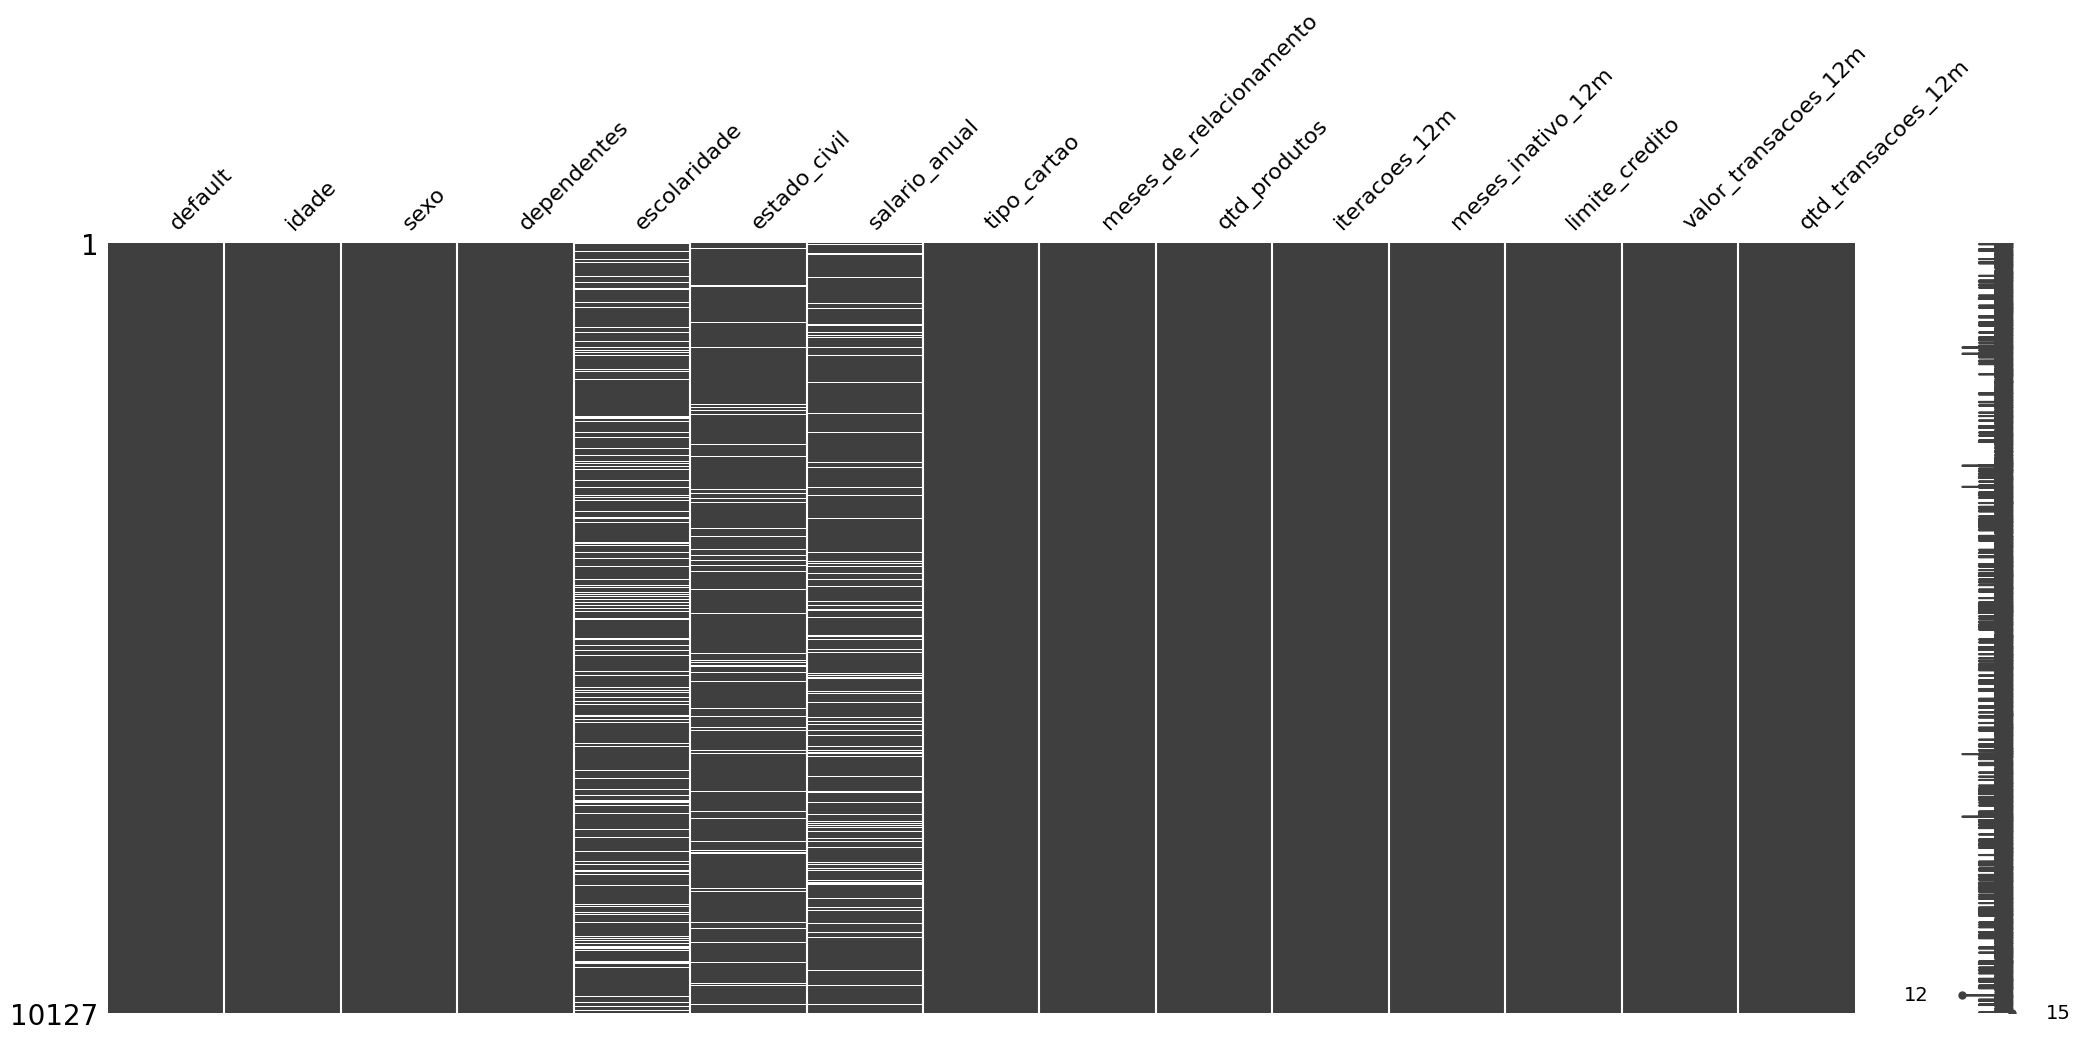

In [7]:
import matplotlib.pyplot as plt

# 🔍 Garante que o DataFrame não está vazio antes de tentar visualizar os dados ausentes.
if not df.empty:
    print("✔ Exibindo matriz de valores ausentes no dataset:\n")
    msno.matrix(df)
    plt.show()
else:
    print("⚠ O DataFrame está vazio. Nenhum dado para visualizar.")

## 4️⃣ Dicionário de Dados

O conjunto de dados "Default Dataset" contém 10.127 registros e 15 variáveis, fornecendo informações detalhadas sobre clientes, abrangendo aspectos demográficos, comportamentais e financeiros.

1. ~**id (int)**: Identificador único do cliente~ (dropado anteriormente)

2. **default (int)**: Indica se o cliente entrou em inadimplência (0 = não, 1 = sim)

3. **idade (int)**: Idade do cliente.

4. **sexo (str)**: Gênero do cliente (M = masculino, F = feminino).

5. **dependentes (int)**: Quantidade de dependentes do cliente.

6. **escolaridade (str)**: Grau de escolaridade do cliente.

7. **estado_civil (str)**: Estado civil do cliente (casado, solteiro, etc.).

8. **salario_anual (str)**: Faixa salarial do cliente.

9. **tipo_cartao (str)**: Tipo de cartão de crédito utilizado pelo cliente.

10. **meses_de_relacionamento (int)**: Tempo, em meses, que o cliente tem relação com a instituição.

11. **qtd_produtos (int)**: Quantidade de produtos financeiros adquiridos pelo cliente.

12. **iteracoes_12m (int)**: Quantidade de interações do cliente com a instituição nos últimos 12 meses.

13. **meses_inativo_12m (int)**: Quantidade de meses em que o cliente esteve inativo nos últimos 12 meses.

14. **limite_credito (float)**: Limite de crédito do cliente.

15. **valor_transacoes_12m (float)**: Valor total das transações feitas pelo cliente nos últimos 12 meses.

16. **qtd_transacoes_12m (int)**: Quantidade de transações realizadas pelo cliente nos últimos 12 meses.

Essas variáveis fornecem uma visão abrangente sobre o perfil dos clientes e seus comportamentos financeiros, permitindo a análise de padrões que influenciam a inadimplência e a tomada de decisões estratégicas para gestão de crédito.

## 5️⃣ Análise Exploratória de Dados (EDA)

> Para entender melhor a distribuição dos dados e possíveis padrões, criamos uma função para visualizar distribuições agrupadas.

In [8]:
import seaborn as sns
import numpy as np

def plotar_distribuicao_agrupada(dados, coluna, agrupar_por='default', normalizar=False):
    """
    Gera boxplots horizontais e histogramas lado a lado para uma coluna numérica,
    comparando grupos definidos pela variável `agrupar_por`, garantindo que os eixos X e os bins sejam iguais.

    Parâmetros:
    - dados: DataFrame contendo os dados.
    - coluna: Nome da coluna numérica a ser analisada.
    - agrupar_por: Nome da coluna categórica que define os grupos.
    - normalizar: Se True, normaliza os histogramas para comparar distribuições.

    Retorna:
    - Gráficos padronizados com o mesmo range no eixo X e a mesma largura dos bins.
    """

    # 🚨 Verificação da existência das colunas no DataFrame
    if coluna not in dados.columns or agrupar_por not in dados.columns:
        print(f"⚠️ Coluna '{coluna}' ou '{agrupar_por}' não encontrada no DataFrame.")
        return

    # 🔄 Removendo valores nulos para evitar erros na visualização
    dados = dados[[coluna, agrupar_por]].dropna()

    # 🔍 Determina o range do eixo X com base em todos os dados
    x_min, x_max = dados[coluna].min(), dados[coluna].max()

    # 📏 Define bins fixos para garantir a mesma largura de classes entre os grupos
    num_bins = int(np.ceil(1 + np.log2(len(dados[coluna]))))  # Regra de Sturges
    bins = np.linspace(x_min, x_max, num_bins)  # 🔄 Define os bins com base em todo o dataset

    # 🔴🔵 Definição das cores (0 = azul para adimplente, 1 = vermelho para inadimplente)
    paleta = {0: '#1F77B4', 1: '#D62728'}

    # 📊 Criando a figura com 2 colunas (boxplot e histograma lado a lado para cada grupo)
    fig, ax = plt.subplots(2, 2, figsize=(14, 7), gridspec_kw={'height_ratios': [1, 3]})
    fig.suptitle(f"Distribuição de {coluna} por {agrupar_por}", fontsize=16)

    # 🔹 Gerando gráficos para cada grupo
    for i, (grupo, cor) in enumerate(paleta.items()):
        dados_grupo = dados[dados[agrupar_por] == grupo]

        # Boxplot
        sns.boxplot(x=dados_grupo[coluna], ax=ax[0, i], color=cor, orient='h')
        ax[0, i].set_title(f"Boxplot ({grupo}, n={len(dados_grupo)})")
        ax[0, i].set_xlabel("")
        ax[0, i].tick_params(axis='x', labelbottom=False)
        ax[0, i].set_xlim(x_min, x_max)  # 🔄 Mantém a mesma escala no eixo X

        # Histograma com bins fixos
        sns.histplot(dados_grupo[coluna], kde=True, bins=bins, ax=ax[1, i],
                     color=cor, stat='density' if normalizar else 'count', alpha=0.6)

        ax[1, i].set_title(f"Histograma ({grupo}, n={len(dados_grupo)})")
        ax[1, i].set_xlabel(coluna)
        ax[1, i].set_ylabel("Densidade" if normalizar else "Frequência")
        ax[1, i].set_xlim(x_min, x_max)  # 🔄 Mantém a mesma escala no eixo X

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # 🔼 Ajuste do espaço para o título
    plt.show()

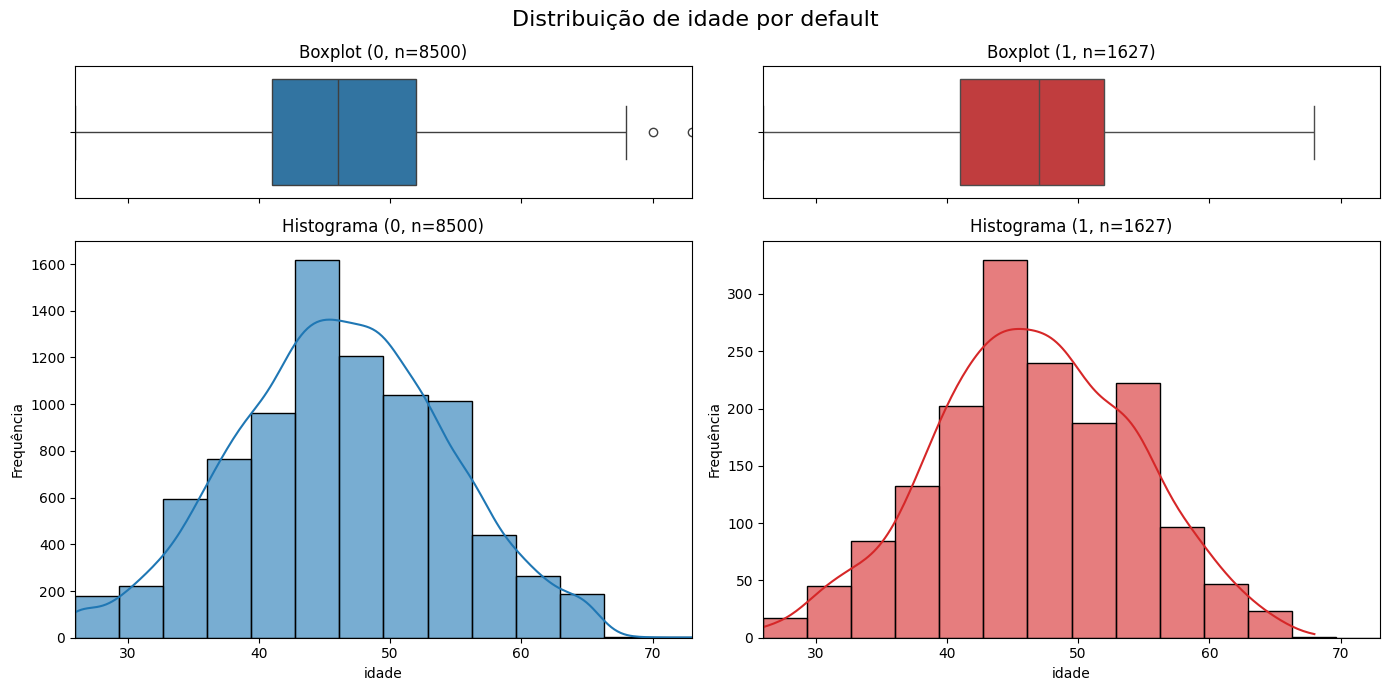

In [9]:
# Distribuição das idades
plotar_distribuicao_agrupada(df, 'idade')

> ✅ **Idade mediana similar**: Ambos os grupos possuem distribuições parecidas

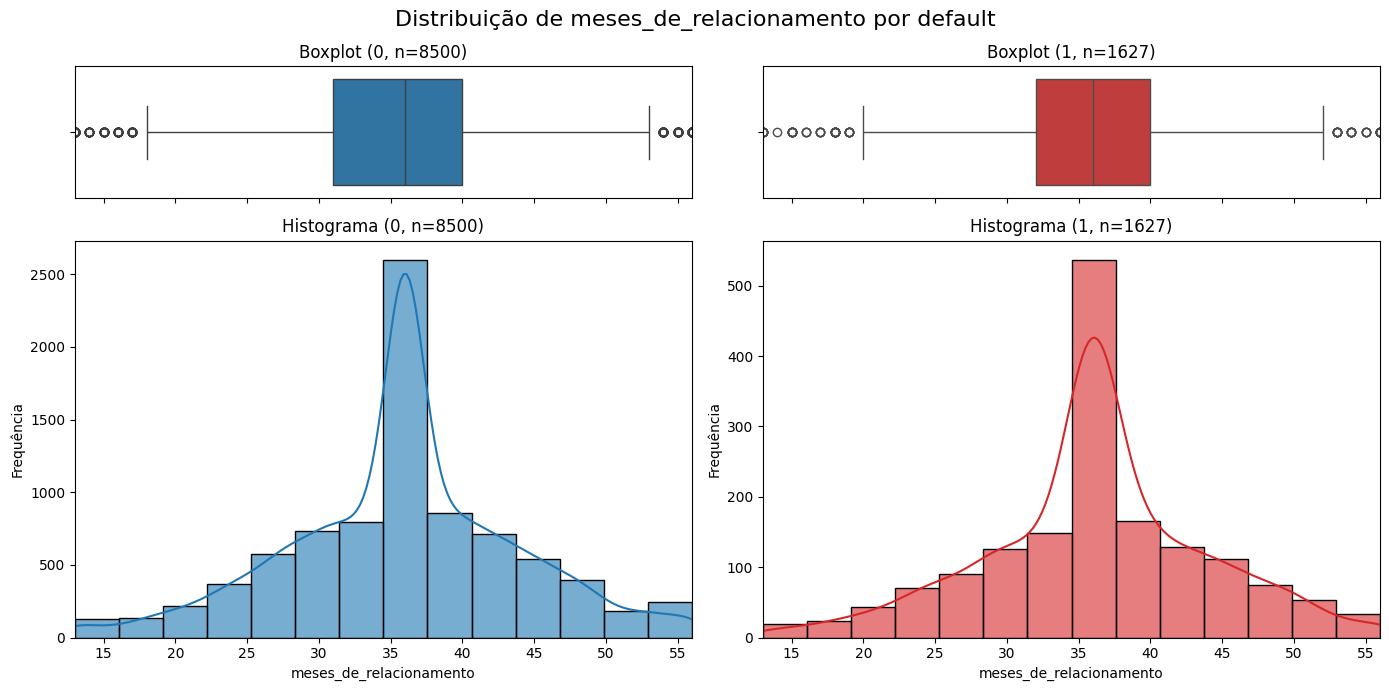

In [10]:
# Distribuição do tempo de relacionamento com a instituição
plotar_distribuicao_agrupada(df, 'meses_de_relacionamento')

> ✅ A distribuição da coluna `meses_de_relacionamento` também tem um comportamento muito parecida entre adimplentes e inadimplentes

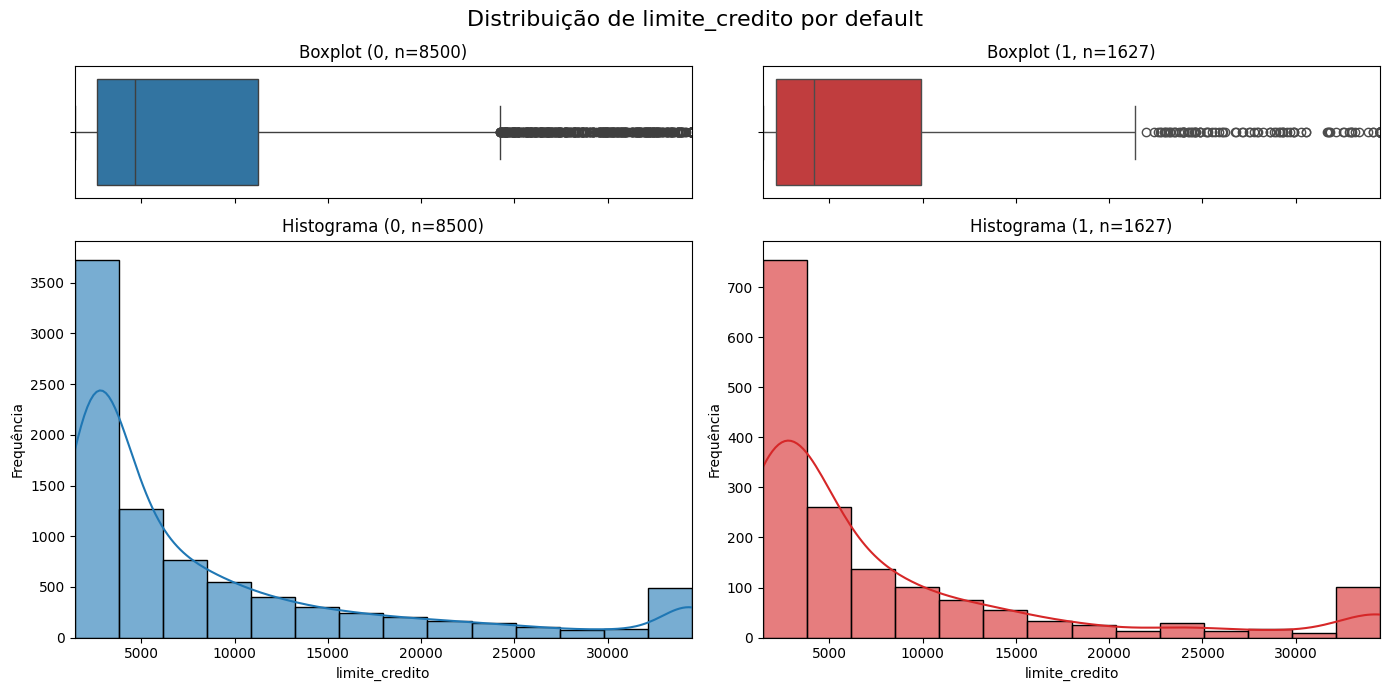

In [11]:
# Distribuição do limite de crédito
plotar_distribuicao_agrupada(df, 'limite_credito')

> ✅ A distribuição da coluna `limite_credito` também é muito parecida entre adimplentes e inadimplentes. Isso pode indicar que ela não seja uma boa variável para explicar a variável `target`

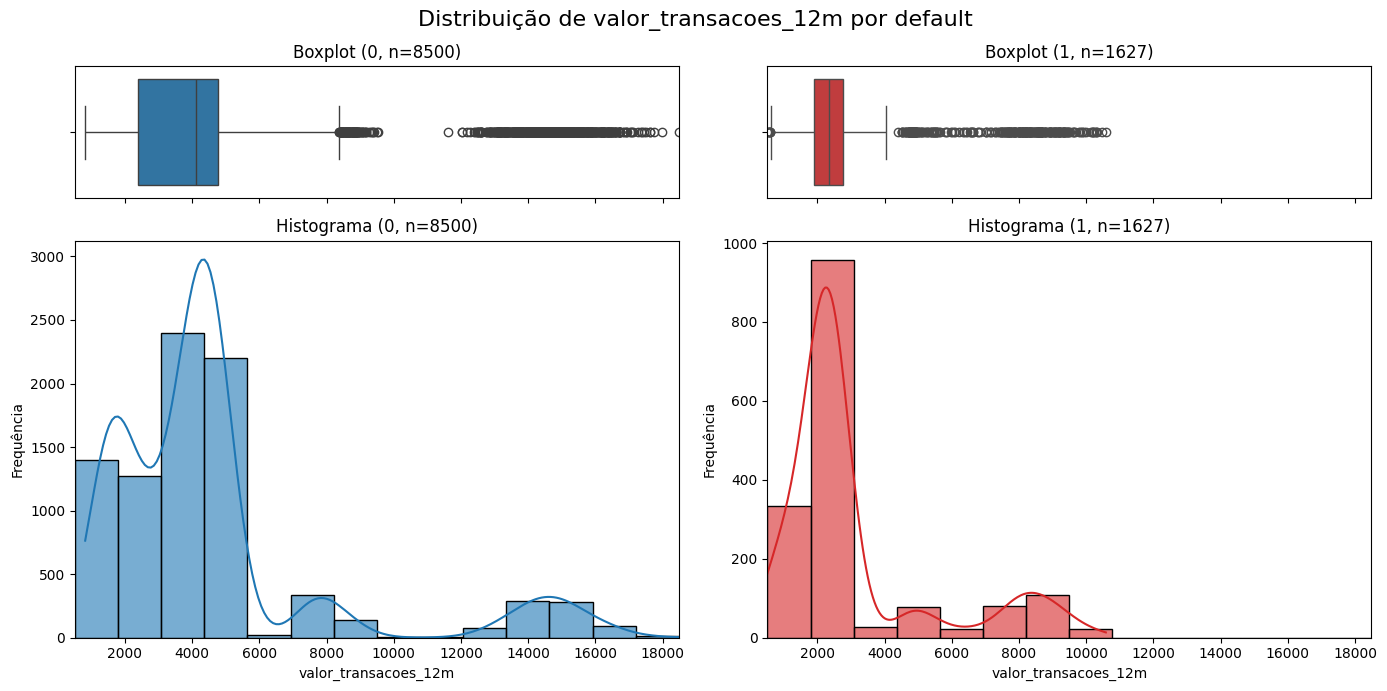

In [12]:
# Distribuição do valor total das transações nos últimos 12 meses
plotar_distribuicao_agrupada(df, 'valor_transacoes_12m')

> 💡 Clientes inadimplentes tendem a ter menores valores transacionados ao longo dos 12 meses, enquanto clientes adimplentes movimentam mais dinheiro. Isso pode sugerir que um maior volume transacionado está relacionado à adimplência, possivelmente porque clientes com maior movimentação financeira possuem mais estabilidade econômica, por exemplo

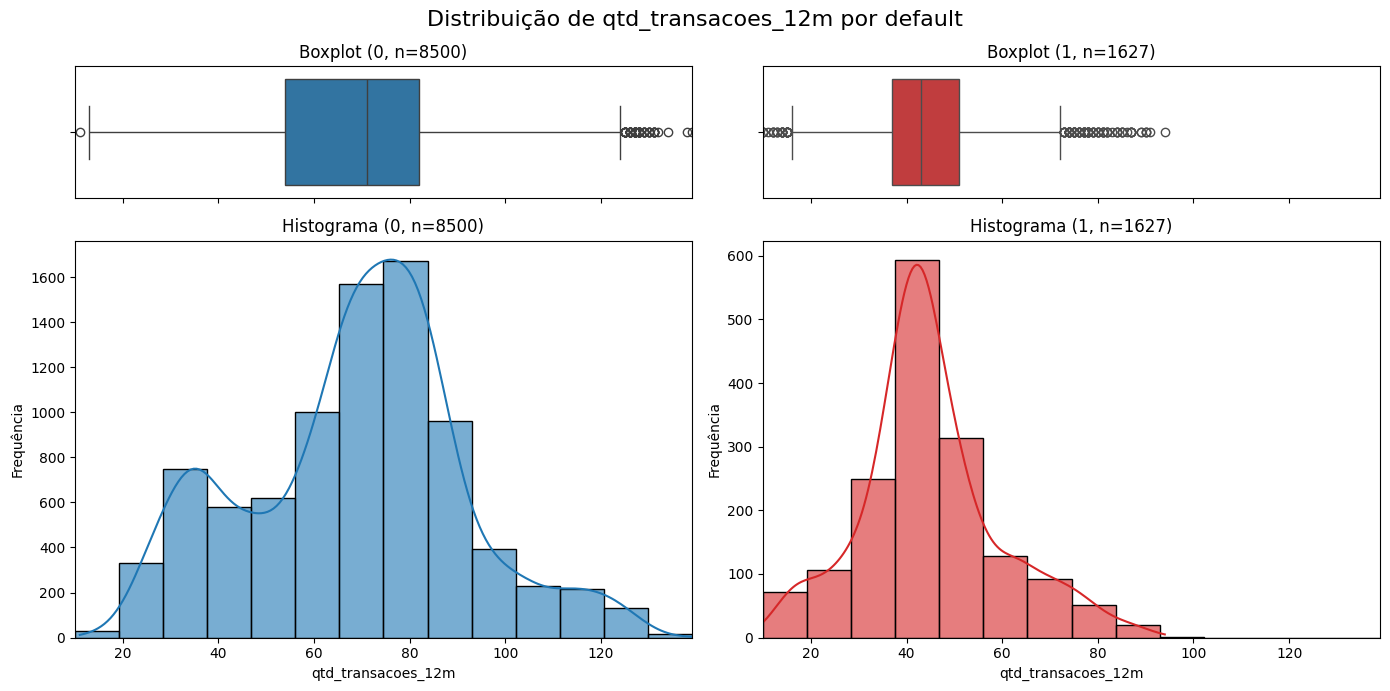

In [13]:
# Distribuição do número de transações nos últimos 12 meses
plotar_distribuicao_agrupada(df, 'qtd_transacoes_12m')

> 💡 Clientes com maior número de transações tendem a ser adimplentes. Isso pode indicar que o uso frequente do cartão está associado a um menor risco de inadimplência, possivelmente porque esses clientes possuem hábitos financeiros mais regulares e previsíveis

### Gráfico de colunas das variáveis categóricas (comparação de adimplentes e inadimplentes)

In [14]:
def plotar_proporcao_categorica_dupla(dados, coluna_categoria, coluna_alvo='default'):
    """
    Gera dois gráficos de colunas lado a lado mostrando as distribuições percentuais
    de uma variável categórica para cada grupo do alvo (adimplente e inadimplente),
    garantindo que os percentuais condizem com as alturas das barras.

    Parâmetros:
    - dados: DataFrame contendo os dados.
    - coluna_categoria: Coluna categórica a ser analisada.
    - coluna_alvo: Nome da coluna de agrupamento (padrão: 'default').
    """

    # ✅ Converter a coluna categórica para string para evitar problemas de ordenação
    dados[coluna_categoria] = dados[coluna_categoria].astype(str)

    # Criar tabela de contingência com percentual dentro de cada grupo do alvo
    tabela = pd.crosstab(dados[coluna_alvo], dados[coluna_categoria], normalize=0) * 100

    # 🎨 Definir cores para cada grupo
    cores = {0: '#1F77B4', 1: '#D62728'}  # Azul para adimplentes, Vermelho para inadimplentes

    # 📊 Criar a figura com 2 gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    for i, grupo in enumerate(sorted(tabela.index)):  # Ordena para garantir consistência (0 antes de 1)
        ax = axes[i]

        # 🔹 Ordenar individualmente dentro de cada grupo (0 e 1)
        tabela_ordenada = tabela.loc[grupo].sort_values(ascending=False)

        # Criar o gráfico de barras corretamente com os percentuais refletindo as alturas
        sns.barplot(x=tabela_ordenada.index, y=tabela_ordenada.values, color=cores[grupo], ax=ax)

        ax.set_title(f"Distribuição de '{coluna_categoria}' para Default = {grupo}", fontsize=14)
        ax.set_xlabel(coluna_categoria)
        ax.set_ylabel("Proporção (%)" if i == 0 else "")

        # ✅ Converter rótulos do eixo X para string para evitar erro de formatação
        ax.set_xticks(range(len(tabela_ordenada.index)))
        ax.set_xticklabels(tabela_ordenada.index, rotation=45)

        # 📊 Adicionar rótulos de porcentagem sobre as barras
        for p, valor in zip(ax.patches, tabela_ordenada.values):
            ax.annotate(f"{valor:.1f}%",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

In [15]:
print("\n📊 Tabela de contingência (% dentro de cada grupo) para Escolaridade:")
display(pd.crosstab(df['escolaridade'], df['default'], normalize='columns').T * 100)


📊 Tabela de contingência (% dentro de cada grupo) para Escolaridade:


escolaridade,doutorado,ensino medio,graduacao,mestrado,sem educacao formal
default,,,,,
0,10.777947,23.587122,11.869559,36.493022,17.272350
1,13.639679,22.319475,11.232677,35.521517,17.286652


> 💡 Usar o percentual de inadimplentes versus adimplentes dentro de uma determinada categoria é um caminho melhor, pois muitos desses grupos estão desbalanceados. Portanto, olhar para o valor bruto poderia trazer informações erradas acerca dos dados

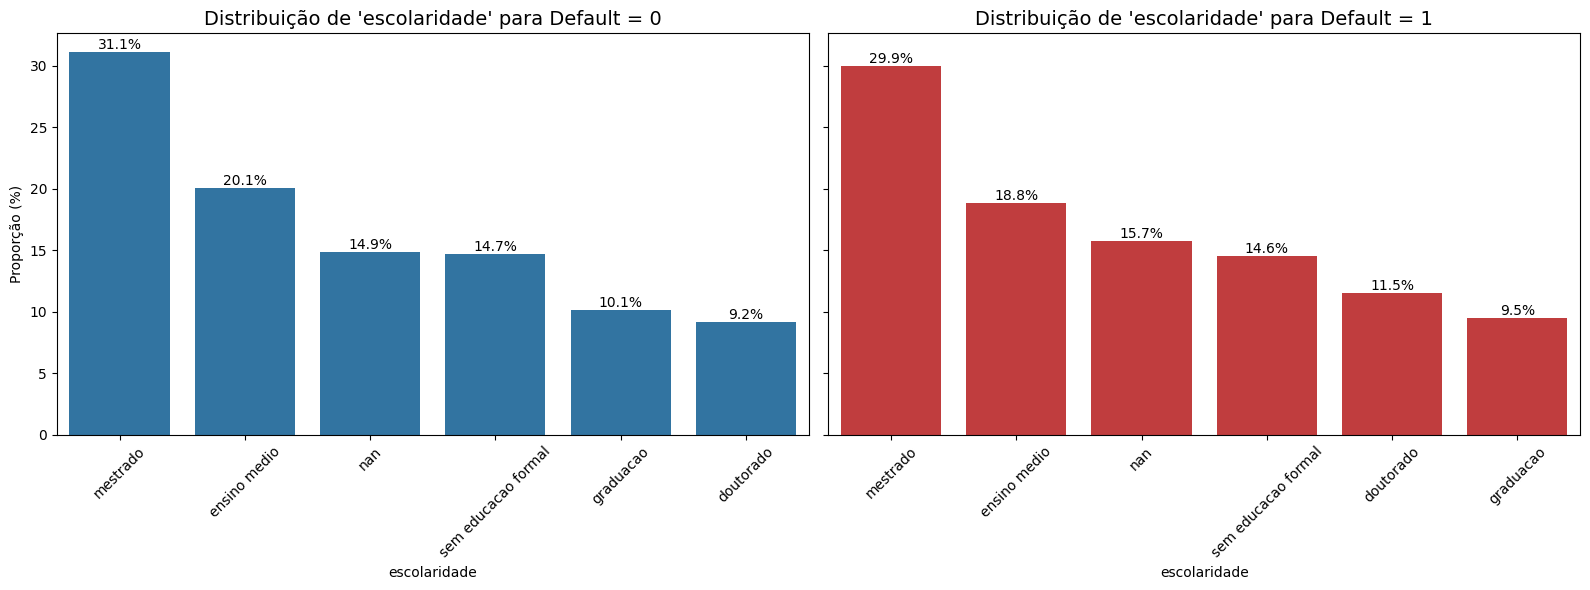

In [16]:
# 🔹 Plotando gráfico de proporção para Escolaridade
plotar_proporcao_categorica_dupla(df, 'escolaridade')

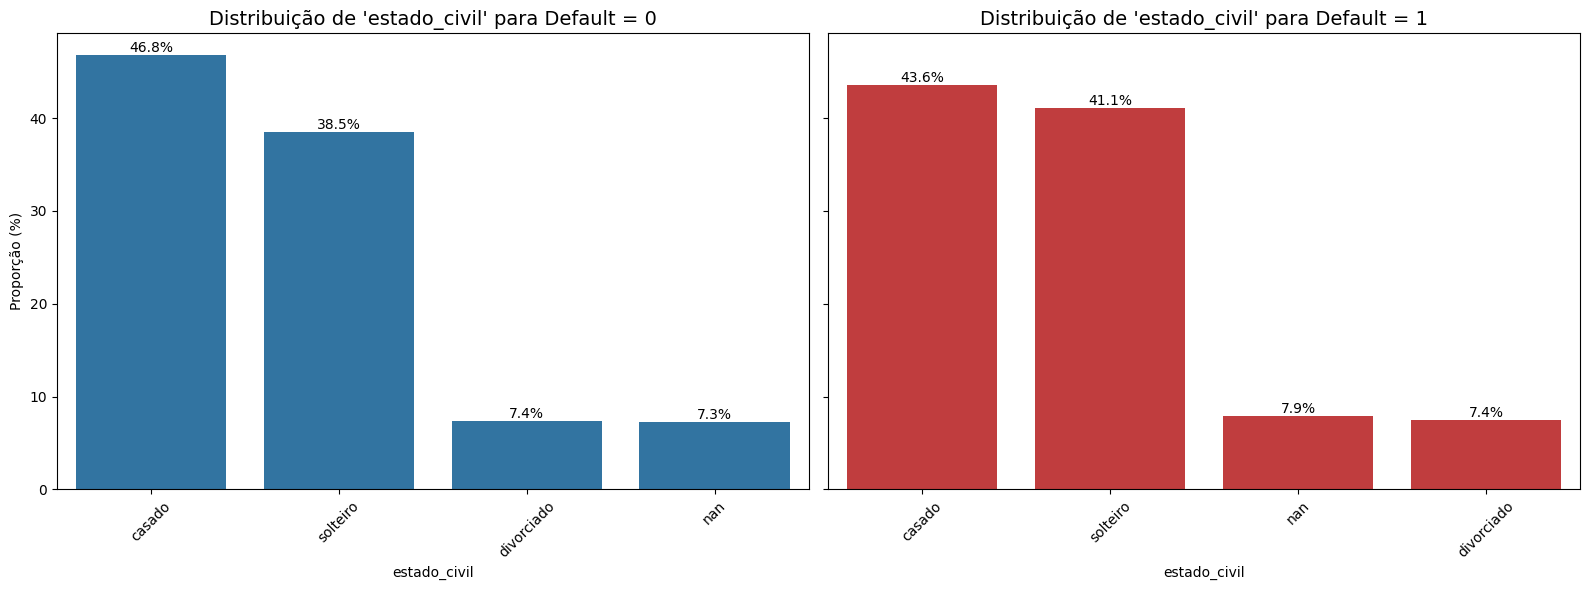

In [17]:
# 🔹 Plotando gráfico de proporção para Estado Civil
plotar_proporcao_categorica_dupla(df, 'estado_civil')

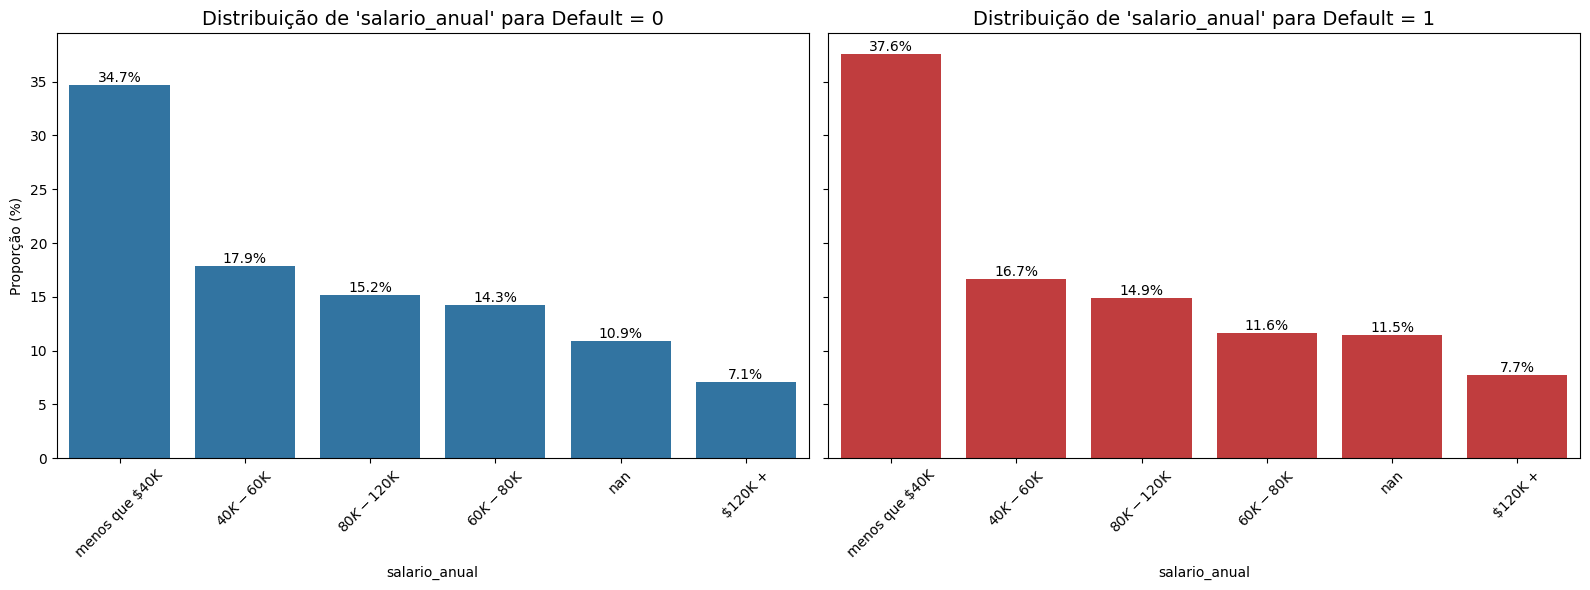

In [18]:
# 📌 Analisando a relação entre faixa salarial e inadimplência
plotar_proporcao_categorica_dupla(df, 'salario_anual')

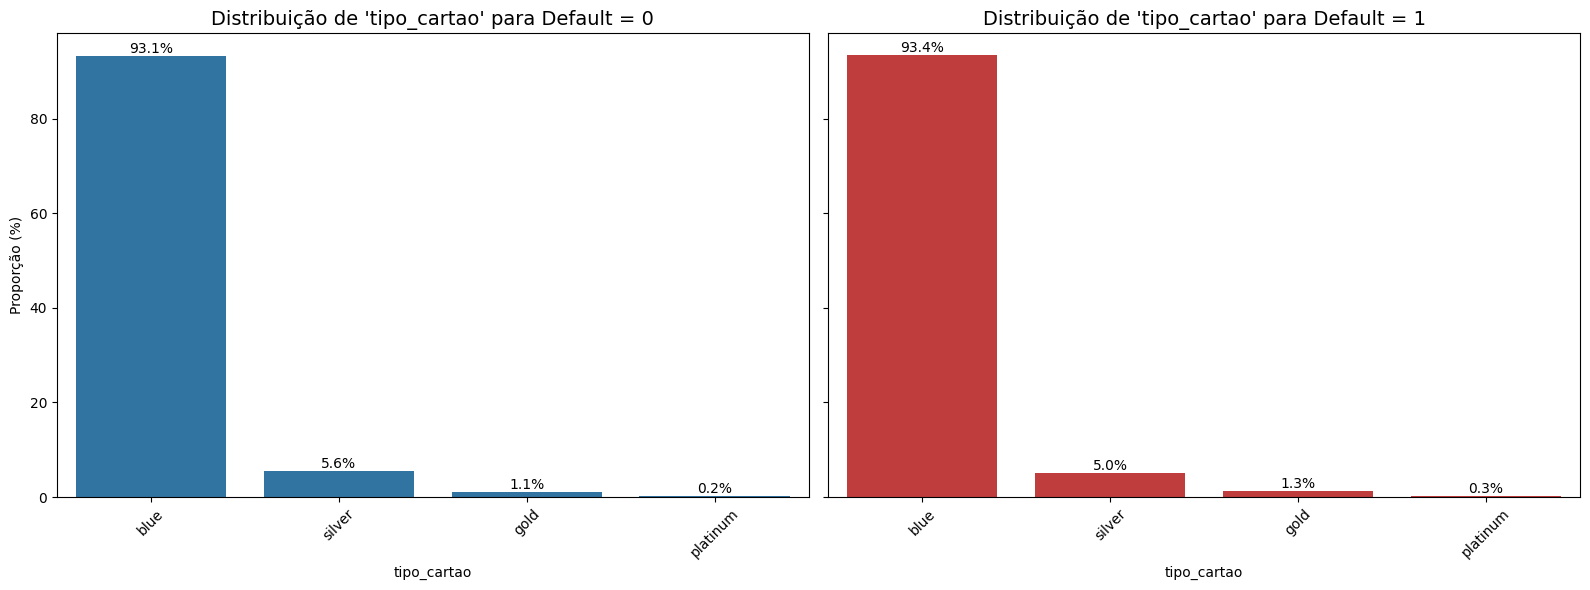

In [19]:
# 📌 Analisando a relação entre tipo de cartão e inadimplência
plotar_proporcao_categorica_dupla(df, 'tipo_cartao')

> A grande maioria dos clientes, tanto inadimplentes quanto adimplentes, possuem o cartão Blue (`~93%`). Isso pode indicar que a oferta desse cartão é muito maior em relação aos outros, sendo o mais comum no portfólio da instituição.

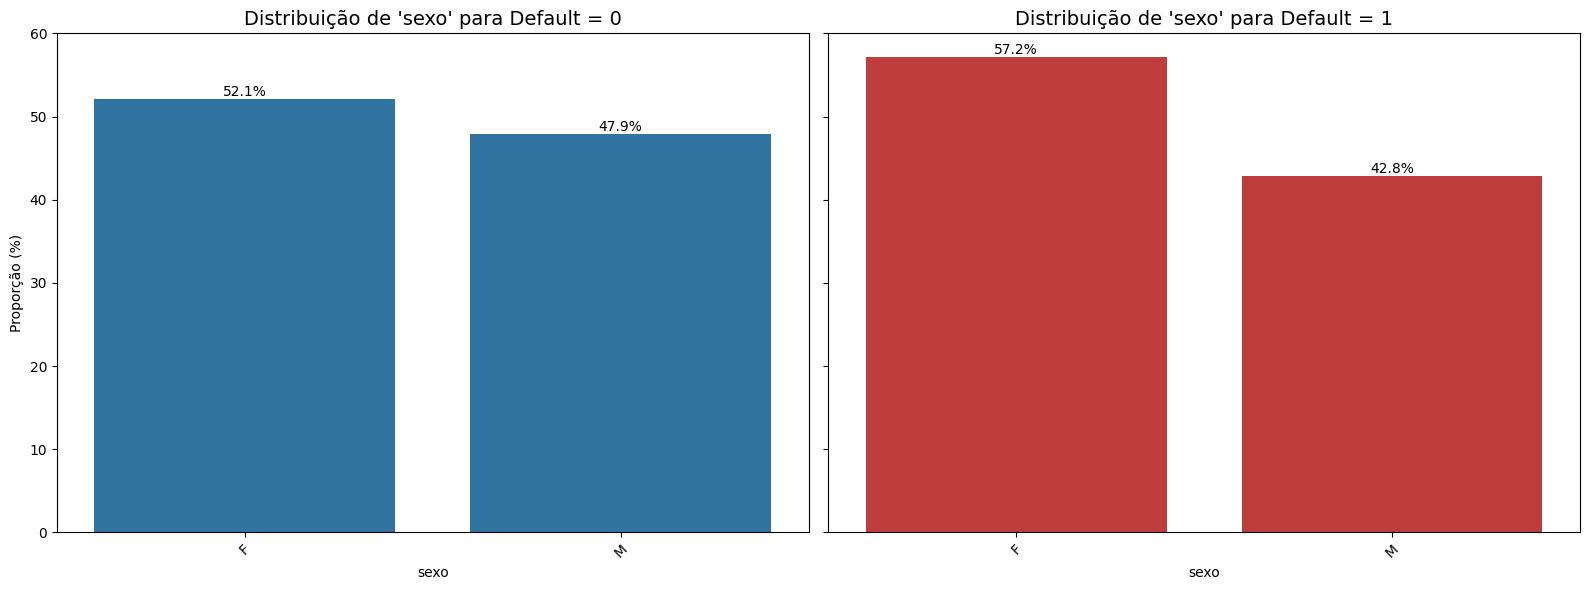

In [20]:
# Proporções agrupadas por Gênero
plotar_proporcao_categorica_dupla(df, 'sexo')

> A inadimplência é um pouco mais comum entre mulheres, já que elas compõem uma proporção maior do grupo de `default = 1` em comparação com `default = 0`.

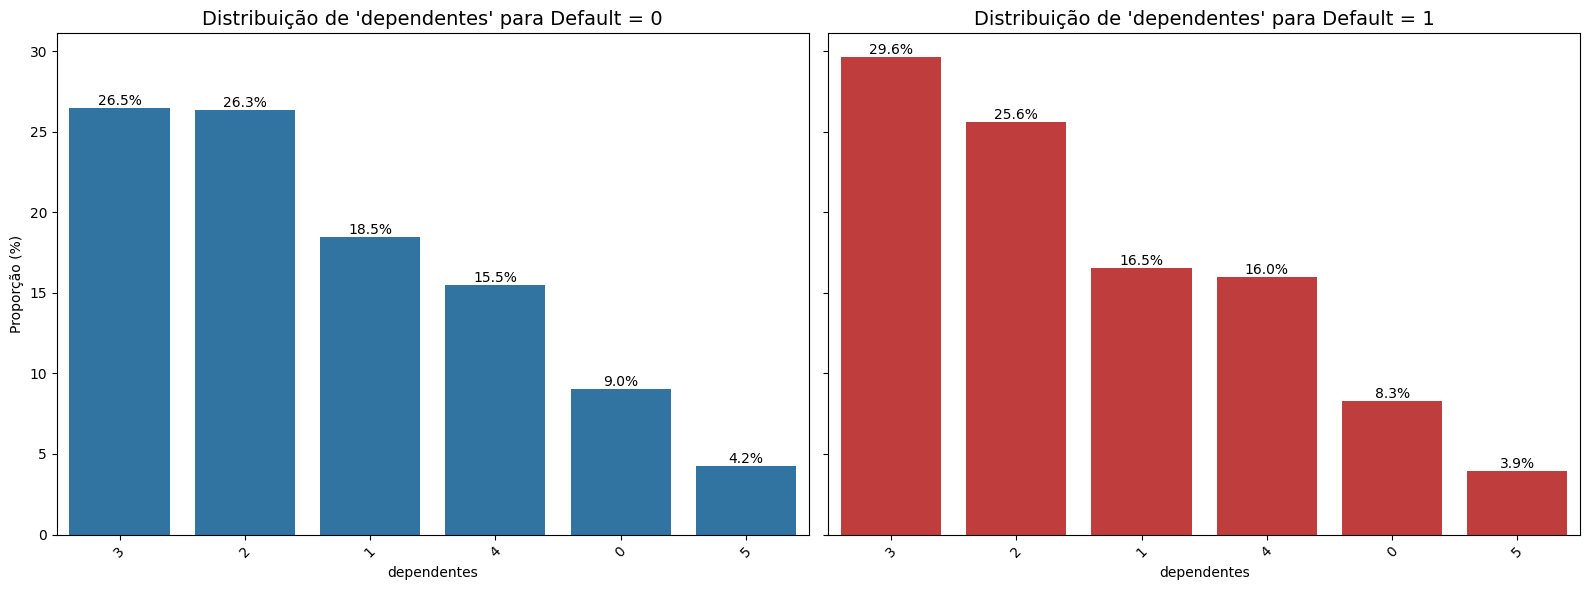

In [21]:
# Proporções agrupadas por Número de Dependentes
plotar_proporcao_categorica_dupla(df, 'dependentes')

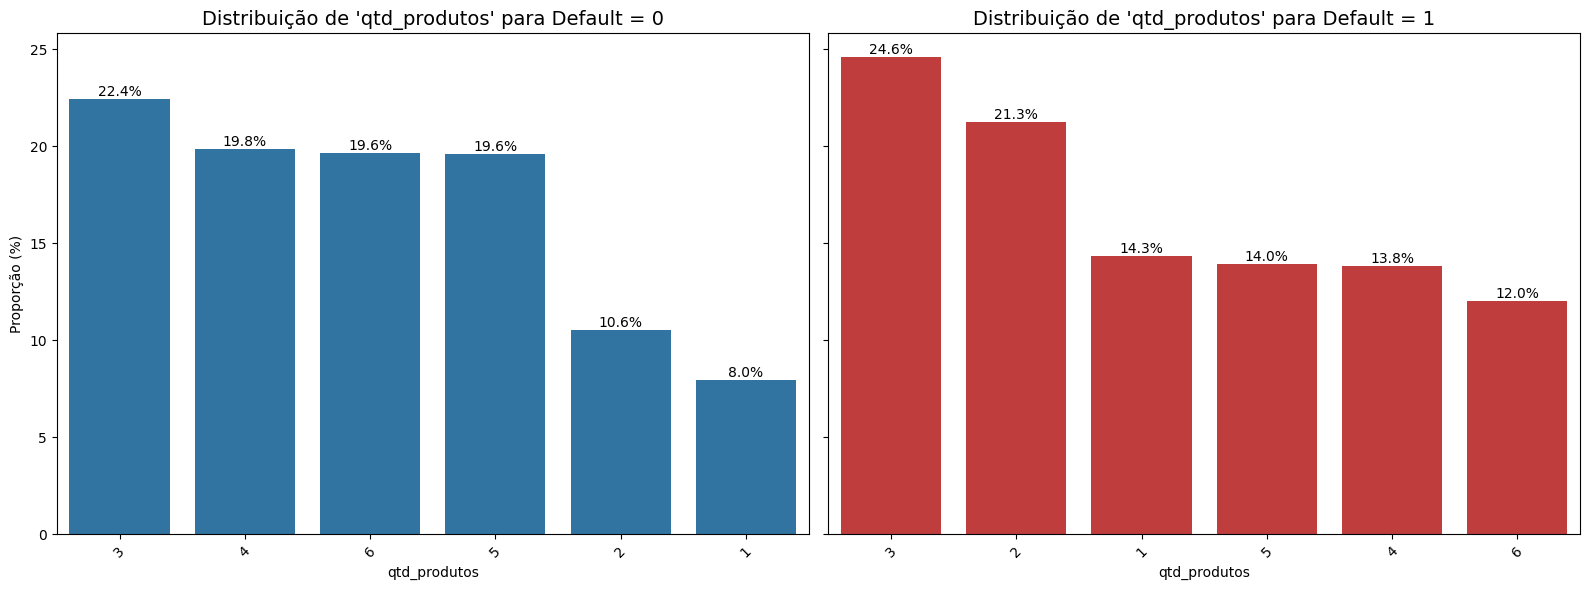

In [22]:
# Proporções agrupadas por Quantidade de Produtos
plotar_proporcao_categorica_dupla(df, 'qtd_produtos')

> No grupo inadimplente, as categorias 4, 5 e 6 produtos têm menores proporções em comparação com os adimplentes, o que pode indicar que clientes que possuem mais produtos financeiros estão menos propensos à inadimplência.

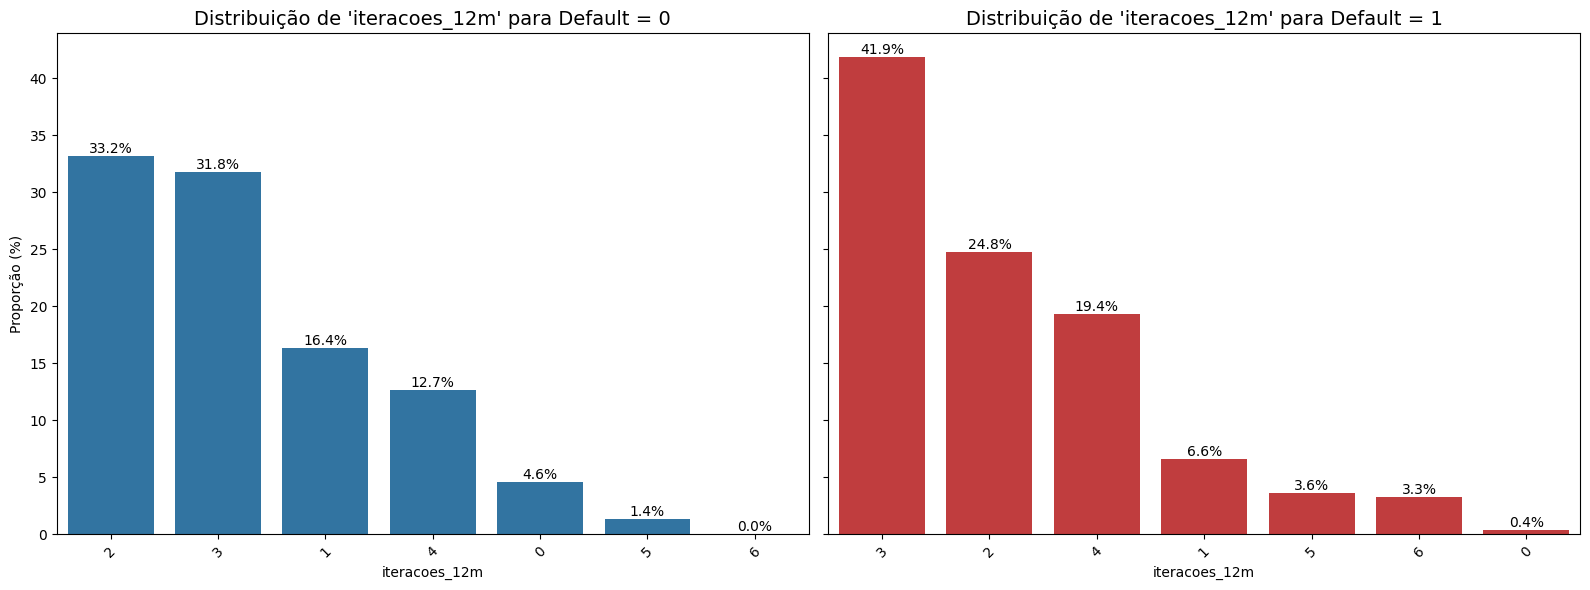

In [23]:
# Proporções agrupadas por Número de Interações nos últimos 12 meses
plotar_proporcao_categorica_dupla(df, 'iteracoes_12m')

> No grupo inadimplente, 41.9% dos clientes tiveram exatamente 3 interações, enquanto no grupo adimplente, essa proporção foi menor (31.8%).

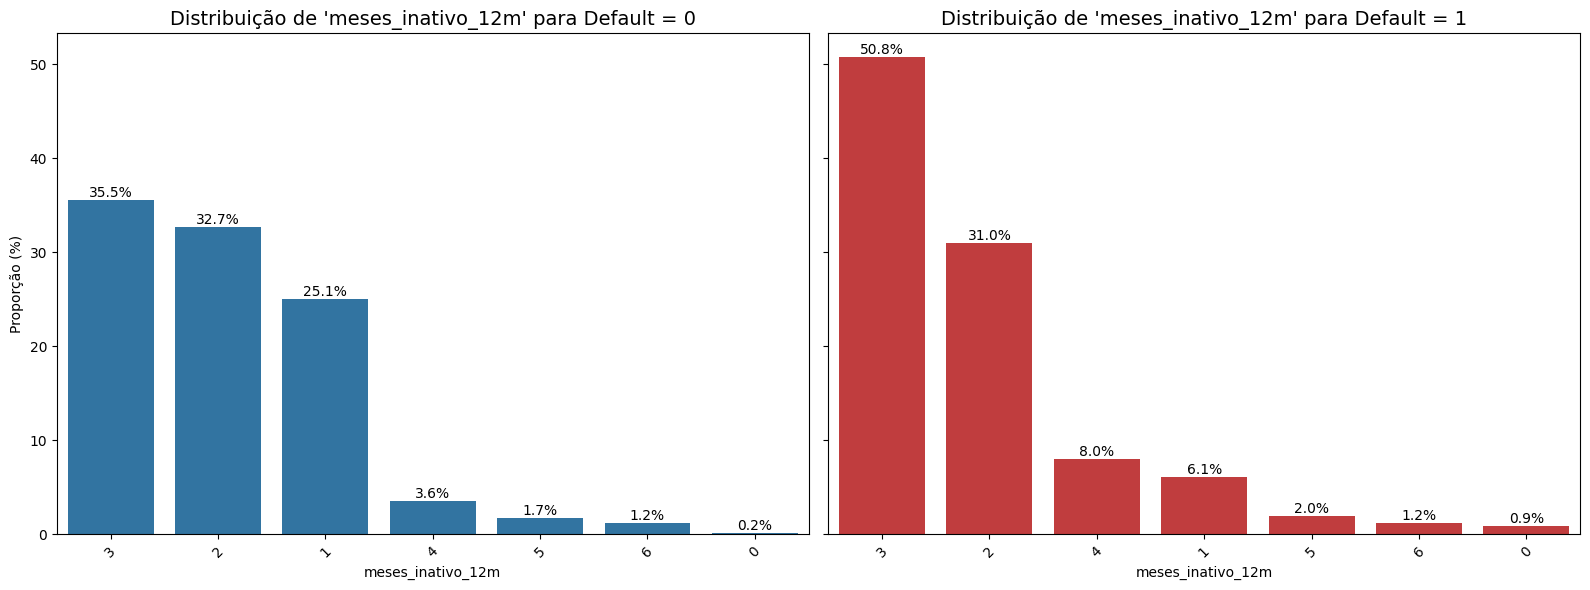

In [24]:
# Proporções agrupadas por Meses Inativo nos últimos 12 meses
plotar_proporcao_categorica_dupla(df, 'meses_inativo_12m')

> 50.8% dos inadimplentes ficaram inativos por 3 meses, enquanto no grupo adimplente essa proporção foi de 35.5%. Isso sugere que **ficar inativo por longos períodos pode ser um indicativo de risco de inadimplência**.

### Análises multivariadas (gráfico de dispersão com hue)

In [25]:
def grafico_dispersao(dados, x_col, y_col, hue_col='default', alpha=0.6, escala_log=False):
    """
    Plota um gráfico de dispersão entre duas variáveis, diferenciando os pontos por uma variável categórica.

    Parâmetros:
    - dados: DataFrame contendo os dados.
    - x_col: Nome da coluna para o eixo X.
    - y_col: Nome da coluna para o eixo Y.
    - hue_col: Coluna categórica para diferenciação das cores (padrão: 'default' - inadimplência).
    - alpha: Transparência dos pontos (padrão: 0.6).
    - escala_log: Se True, aplica escala logarítmica para melhor visualização de dispersões grandes.
    """
    plt.figure(figsize=(10, 6))

    # Definir paleta de cores mais contrastante
    paleta = {0: '#1F77B4', 1: '#D62728'}  # Azul para adimplentes, Vermelho para inadimplentes

    # Criar scatterplot com categorização por cor
    scatter = sns.scatterplot(
        data=dados, x=x_col, y=y_col, hue=hue_col, palette=paleta, alpha=alpha
    )

    plt.title(f'Gráfico de Dispersão: {x_col} vs {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Aplicar escala logarítmica se necessário
    if escala_log:
        plt.xscale('log')
        plt.yscale('log')

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

1️⃣ Limite de Crédito vs. Valor Total das Transações
- Hipótese: Clientes com maior limite de crédito realizam transações de maior valor?

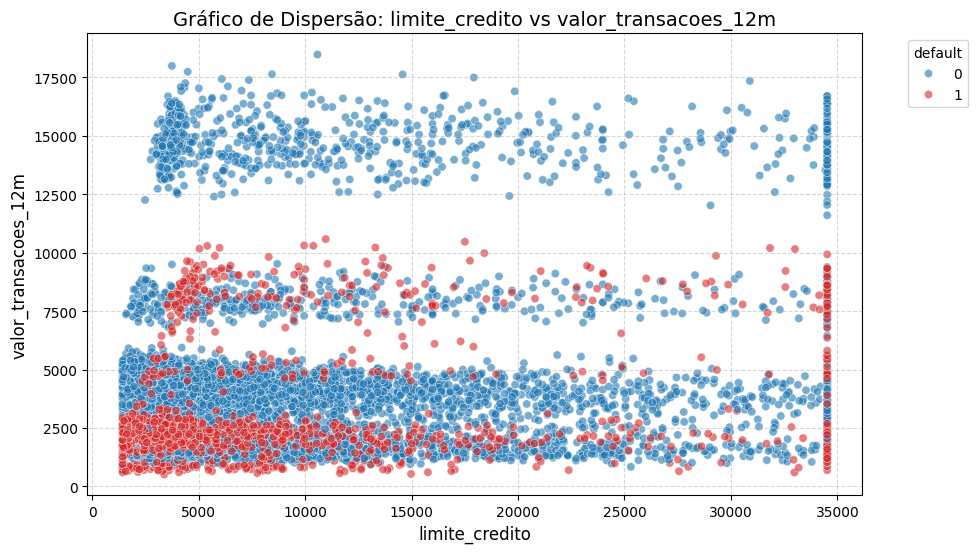

In [26]:
grafico_dispersao(df, 'limite_credito', 'valor_transacoes_12m')

> O gráfico mostra uma tendência geral de aumento no valor total de transações conforme o limite de crédito cresce, especialmente nas faixas mais altas.
No entanto, muitos clientes inadimplentes concentram-se em valores de transação mais baixos, mesmo quando têm limite elevado, o que pode indicar subutilização do crédito ou restrições comportamentais/financeiras.
Além disso, observa-se a presença de platôs nos valores de transação, o que pode refletir arredondamentos nos dados ou limites operacionais definidos previamente.

2️⃣ Limite de Crédito vs. Quantidade de Transações
- Hipótese: Quanto maior o limite de crédito, mais transações são realizadas?

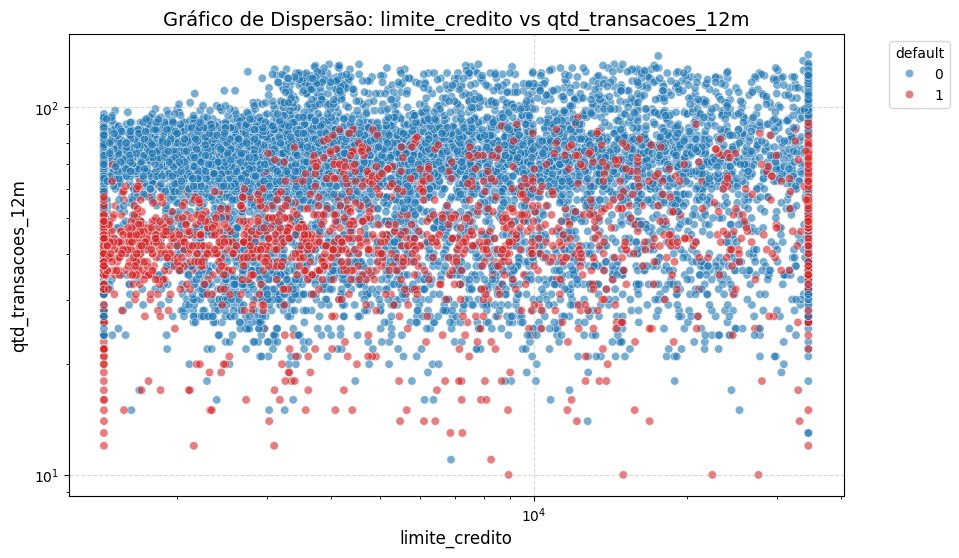

In [27]:
grafico_dispersao(df, 'limite_credito', 'qtd_transacoes_12m', escala_log=True)

> Há uma concentração maior de inadimplentes na parte inferior do gráfico (menos transações). Isso pode sugerir que clientes inadimplentes usam o cartão com menor frequência ou fazem transações menos recorrentes.

> Outra hipótese é que **clientes que usam o cartão com menos frequência têm maior probabilidade de inadimplência**, o que pode estar relacionado à falta de controle financeiro ou uso do crédito em situações pontuais.

3️⃣ Valor Total das Transações vs. Quantidade de Transações
- Hipótese: Existe um padrão de gastos entre os clientes que fazem mais ou menos transações?

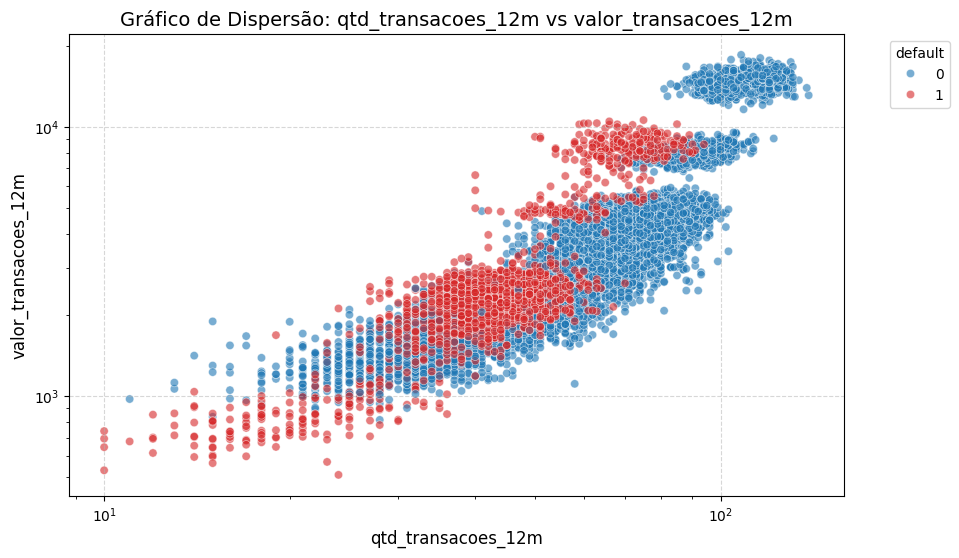

In [28]:
grafico_dispersao(df, 'qtd_transacoes_12m', 'valor_transacoes_12m', escala_log=True)

> Muitos clientes inadimplentes estão na parte intermediária do gráfico, com um número razoável de transações, mas valores movimentados mais baixos. Isso sugere que **clientes inadimplentes fazem transações frequentes, mas não movimentam tanto dinheiro quanto os adimplentes**.

## 6️⃣ Preparação dos dados para a modelagem

### Divisão dos dados usando `stratified sampling`

In [29]:
# Criação de uma variável para guardar o "random_state" que será aplicado ao longo do projeto
SEED = None

In [30]:
from sklearn.model_selection import train_test_split

def dividir_dados(df, target='default', test_size=0.2, random_state=SEED):
    """
    Divide os dados de forma estratificada, garantindo que a distribuição da variável alvo seja preservada.

    Parâmetros:
    - df: DataFrame contendo os dados.
    - target: Nome da variável alvo.
    - test_size: Proporção do conjunto de teste (padrão: 20%).
    - random_state: Semente para reprodutibilidade (padrão: SEED).

    Retorna:
    - df_treino: DataFrame de treino.
    - df_teste: DataFrame de teste.
    """
    if target not in df.columns:
        raise ValueError(f"A coluna '{target}' não foi encontrada no DataFrame.")

    X = df.drop(columns=[target])
    y = df[target]

    X_treino, X_teste, y_treino, y_teste = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Reconstruindo os DataFrames com a variável target
    df_treino = X_treino.assign(**{target: y_treino})
    df_teste = X_teste.assign(**{target: y_teste})

    return df_treino, df_teste

df_treino, df_teste = dividir_dados(df, target='default')

In [31]:
# 🔹 Confirmação de que o `stratify` manteve a proporção da variável alvo
print("Distribuição no conjunto de treino:")
print(df_treino['default'].value_counts(normalize=True) * 100)

print("\nDistribuição no conjunto de teste:")
print(df_teste['default'].value_counts(normalize=True) * 100)

Distribuição no conjunto de treino:
default
0    83.92791
1    16.07209
Name: proportion, dtype: float64

Distribuição no conjunto de teste:
default
0    83.958539
1    16.041461
Name: proportion, dtype: float64


In [32]:
# 🔹 Verificação da estrutura dos DataFrames após a divisão
print("Informações do conjunto de treino:")
df_treino.info()

print("\nInformações do conjunto de teste:")
df_teste.info()

Informações do conjunto de treino:
<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 2138 to 1675
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    8101 non-null   int64  
 1   sexo                     8101 non-null   object 
 2   dependentes              8101 non-null   object 
 3   escolaridade             8101 non-null   object 
 4   estado_civil             8101 non-null   object 
 5   salario_anual            8101 non-null   object 
 6   tipo_cartao              8101 non-null   object 
 7   meses_de_relacionamento  8101 non-null   int64  
 8   qtd_produtos             8101 non-null   object 
 9   iteracoes_12m            8101 non-null   object 
 10  meses_inativo_12m        8101 non-null   object 
 11  limite_credito           8101 non-null   float64
 12  valor_transacoes_12m     8101 non-null   float64
 13  qtd_transacoes_12m       8101 non-null   int6

### Preenchimento dos valores nulos

In [33]:
from sklearn.impute import KNNImputer, SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# --- FUNÇÃO PARA PREENCHER VALORES NULOS COM KNN ---
def preencher_nulos_knn_colunas(df, colunas, n_neighbors=5):
    df_preenchido = df.copy()

    # Selecionar somente as colunas que serão imputadas
    df_para_imputar = df_preenchido[colunas]

    # Aplicar OneHot Encoding somente nas colunas categóricas selecionadas
    df_encoded = pd.get_dummies(df_para_imputar, drop_first=True)

    # ✅ Verificar se existem NaNs antes de imputar
    if df_encoded.isna().sum().sum() > 0:
        # Imputar com KNN
        imputer = KNNImputer(n_neighbors=n_neighbors)
        df_imputado_array = imputer.fit_transform(df_encoded)

        # DataFrame com valores imputados
        df_imputado = pd.DataFrame(df_imputado_array, columns=df_encoded.columns, index=df.index)

        # Reverter as dummies para a categoria original
        for coluna in colunas:
            categorias_originais = df[coluna].dropna().unique()
            categorias_dummies = [c for c in df_imputado.columns if c.startswith(coluna+"_")]
            categoria_mais_proxima = df_imputado[categorias_dummies].idxmax(axis=1).apply(lambda x: x.replace(f"{coluna}_", ""))

            df_preenchido[coluna] = categoria_mais_proxima
            df_preenchido[coluna] = df_preenchido[coluna].astype(pd.CategoricalDtype(categorias_originais))

    return df_preenchido

# Aplicando no conjunto de treino e teste:
colunas_com_nulos = ['escolaridade', 'estado_civil', 'salario_anual']
df_treino = preencher_nulos_knn_colunas(df_treino, colunas_com_nulos)
df_teste = preencher_nulos_knn_colunas(df_teste, colunas_com_nulos)

In [34]:
# Verificação final
print("\nInformações após tratamento de valores nulos (Teste):")
df_teste.info()


Informações após tratamento de valores nulos (Teste):
<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 8566 to 9658
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    2026 non-null   int64  
 1   sexo                     2026 non-null   object 
 2   dependentes              2026 non-null   object 
 3   escolaridade             2026 non-null   object 
 4   estado_civil             2026 non-null   object 
 5   salario_anual            2026 non-null   object 
 6   tipo_cartao              2026 non-null   object 
 7   meses_de_relacionamento  2026 non-null   int64  
 8   qtd_produtos             2026 non-null   object 
 9   iteracoes_12m            2026 non-null   object 
 10  meses_inativo_12m        2026 non-null   object 
 11  limite_credito           2026 non-null   float64
 12  valor_transacoes_12m     2026 non-null   float64
 13  qtd_transacoes_12m       

### Pré-processamento

In [35]:
# --- PRÉ-PROCESSAMENTO ---
def preprocessar_dados(dados_treino, dados_teste):
    """
    Aplica transformações categóricas e imputação consistente em treino e teste.

    Parâmetros:
    - dados_treino: DataFrame treino.
    - dados_teste: DataFrame teste.

    Retorna:
    - DataFrames treino e teste transformados consistentemente.
    """
    dados_treino = dados_treino.copy()
    dados_teste = dados_teste.copy()

    # Marcar cada DataFrame para separá-los depois
    dados_treino['dataset'] = 'treino'
    dados_teste['dataset'] = 'teste'

    # Concatenar treino e teste
    dados_completos = pd.concat([dados_treino, dados_teste])

    # Mapeamentos de Label Encoding
    mapeamentos = {
        'salario_anual': {'menos que $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5},
        'escolaridade': {'sem educacao formal': 1, 'ensino medio': 2, 'graduacao': 3, 'mestrado': 4, 'doutorado': 5},
        'tipo_cartao': {'blue': 1, 'silver': 2, 'gold': 3, 'platinum': 4}
    }

    for coluna, mapa in mapeamentos.items():
        if coluna in dados_completos.columns:
            dados_completos[coluna] = dados_completos[coluna].map(mapa)

    # ✅ Garantir que treino e teste tenham as mesmas colunas após One-Hot Encoding
    colunas_categoricas = ['estado_civil', 'sexo']
    dados_completos = pd.get_dummies(dados_completos, columns=colunas_categoricas, drop_first=True, dtype=int)

    # Separar novamente em treino e teste
    dados_treino_final = dados_completos[dados_completos['dataset'] == 'treino'].drop('dataset', axis=1)
    dados_teste_final = dados_completos[dados_completos['dataset'] == 'teste'].drop('dataset', axis=1)

    # ✅ Aplicar imputação final caso ainda existam NaNs
    imputer_final = SimpleImputer(strategy='median')
    dados_treino_final[:] = imputer_final.fit_transform(dados_treino_final)
    dados_teste_final[:] = imputer_final.transform(dados_teste_final)

    return dados_treino_final, dados_teste_final

# Aplicar pré-processamento consistente:
df_treino_transf, df_teste_transf = preprocessar_dados(df_treino, df_teste)

In [36]:
# Verificação após transformação
print("\n📌 Informações do conjunto de treino pós-transformação:")
df_treino_transf.info()


📌 Informações do conjunto de treino pós-transformação:
<class 'pandas.core.frame.DataFrame'>
Index: 8101 entries, 2138 to 1675
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    8101 non-null   int64  
 1   dependentes              8101 non-null   object 
 2   escolaridade             8101 non-null   float64
 3   salario_anual            8101 non-null   float64
 4   tipo_cartao              8101 non-null   int64  
 5   meses_de_relacionamento  8101 non-null   int64  
 6   qtd_produtos             8101 non-null   object 
 7   iteracoes_12m            8101 non-null   object 
 8   meses_inativo_12m        8101 non-null   object 
 9   limite_credito           8101 non-null   float64
 10  valor_transacoes_12m     8101 non-null   float64
 11  qtd_transacoes_12m       8101 non-null   int64  
 12  default                  8101 non-null   int64  
 13  estado_civil_divorciado 

In [37]:
print("\n📌 Informações do conjunto de teste pós-transformação:")
df_teste_transf.info()


📌 Informações do conjunto de teste pós-transformação:
<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 8566 to 9658
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    2026 non-null   int64  
 1   dependentes              2026 non-null   object 
 2   escolaridade             2026 non-null   float64
 3   salario_anual            2026 non-null   float64
 4   tipo_cartao              2026 non-null   int64  
 5   meses_de_relacionamento  2026 non-null   int64  
 6   qtd_produtos             2026 non-null   object 
 7   iteracoes_12m            2026 non-null   object 
 8   meses_inativo_12m        2026 non-null   object 
 9   limite_credito           2026 non-null   float64
 10  valor_transacoes_12m     2026 non-null   float64
 11  qtd_transacoes_12m       2026 non-null   int64  
 12  default                  2026 non-null   int64  
 13  estado_civil_divorciado  

### Matriz de correlação

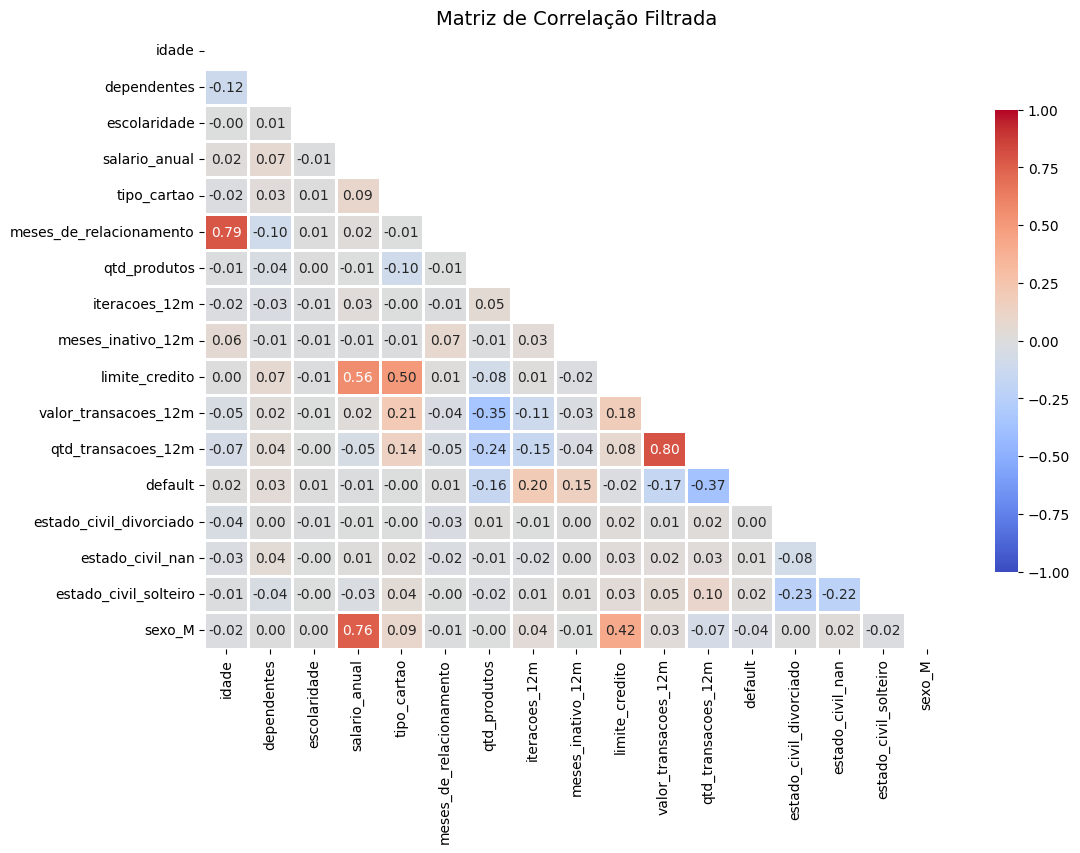

In [38]:
# --- MATRIZ DE CORRELAÇÃO ---
def plot_matriz_correlacao(df, threshold=0.3):
    """
    Plota a matriz de correlação, destacando apenas os valores acima do threshold.

    Parâmetros:
    - df: DataFrame contendo os dados numéricos.
    - threshold: Valor mínimo absoluto para exibir anotações.

    Retorno:
    - Heatmap da matriz de correlação.
    """
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", center=0,
                linewidths=1, cbar_kws={'shrink': 0.75}, annot_kws={"size": 10},
                vmin=-1, vmax=1)

    plt.title("Matriz de Correlação Filtrada", fontsize=14)
    plt.show()

# Chamando a função
plot_matriz_correlacao(df_treino_transf)

### Separação das variáveis explicativas e alvo

In [39]:
# --- SEPARAÇÃO DAS VARIÁVEIS EXPLICATIVAS E ALVO ---
def separar_variaveis(df_treino, df_teste, alvo='default'):
    X_treino = df_treino.drop(columns=[alvo])
    y_treino = df_treino[alvo]

    X_teste = df_teste.drop(columns=[alvo])
    y_teste = df_teste[alvo]

    print("\n📌 Tamanho dos conjuntos de treino e teste:")
    print(f"  - X_treino: {X_treino.shape}, y_treino: {y_treino.shape}")
    print(f"  - X_teste: {X_teste.shape}, y_teste: {y_teste.shape}")

    return X_treino, y_treino, X_teste, y_teste

# Aplicando a separação das variáveis
X_treino, y_treino, X_teste, y_teste = separar_variaveis(df_treino_transf, df_teste_transf)


📌 Tamanho dos conjuntos de treino e teste:
  - X_treino: (8101, 16), y_treino: (8101,)
  - X_teste: (2026, 16), y_teste: (2026,)


In [40]:
# 🔹 Conferindo as primeiras linhas
print("\n🔹 Amostra de X_treino:")
display(X_treino.head(2))

print("\n🔹 Amostra de y_treino:")
display(y_treino.head(2))

print("\n🔹 Amostra de X_teste:")
display(X_teste.head(2))

print("\n🔹 Amostra de y_teste:")
display(y_teste.head(2))


🔹 Amostra de X_treino:


,idade,dependentes,escolaridade,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,estado_civil_divorciado,estado_civil_nan,estado_civil_solteiro,sexo_M
2138,26,0.0,2.0,1.0,1,36,6.0,3.0,3.0,2735.93,2441.92,58,0,0,1,1
7834,38,1.0,4.0,4.0,1,29,3.0,3.0,3.0,2155.98,3781.00,61,0,0,1,1



🔹 Amostra de y_treino:


,default
2138,0
7834,0



🔹 Amostra de X_teste:


,idade,dependentes,escolaridade,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,estado_civil_divorciado,estado_civil_nan,estado_civil_solteiro,sexo_M
8566,59,0.0,1.0,3.0,1,48,2.0,2.0,6.0,13172.76,2598.07,47,0,1,0,1
3283,55,2.0,4.0,5.0,1,36,5.0,2.0,2.0,12856.95,3364.96,61,0,0,1,1



🔹 Amostra de y_teste:


,default
8566,1
3283,0


### SMOTE

In [41]:
!pip install -U imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.3 MB/s eta 0:00:00


In [42]:
from imblearn.over_sampling import SMOTE

# --- Aplicação do SMOTE ---
def aplicar_smote(X_treino, y_treino):
    smote = SMOTE(sampling_strategy='auto', random_state=SEED)
    X_treino_resampled, y_treino_resampled = smote.fit_resample(X_treino, y_treino)
    print(f"✅ SMOTE aplicado: {len(y_treino)} → {len(y_treino_resampled)} amostras")
    return X_treino_resampled, y_treino_resampled

# Aplicando o SMOTE
X_treino_resampled, y_treino_resampled = aplicar_smote(X_treino, y_treino)

✅ SMOTE aplicado: 8101 → 13598 amostras


In [43]:
from sklearn.impute import SimpleImputer

# Verificação e tratamento de valores NaN após SMOTE
imputer = SimpleImputer(strategy='median')  # Preenche NaNs com a média das colunas
X_treino_resampled = pd.DataFrame(imputer.fit_transform(X_treino_resampled), columns=X_treino.columns)

### Padronização dos dados

In [44]:
from sklearn.preprocessing import StandardScaler

# --- PADRONIZAÇÃO DOS DADOS ---
def padronizar_dados(X_treino, X_teste):
    """
    Padroniza os dados usando StandardScaler.

    Parâmetros:
    - X_treino: Conjunto de treino.
    - X_teste: Conjunto de teste.

    Retorna:
    - X_treino_scaled: Dados padronizados do treino.
    - X_teste_scaled: Dados padronizados do teste.
    - scaler: Objeto StandardScaler treinado.
    """
    scaler = StandardScaler()
    X_treino_scaled = scaler.fit_transform(X_treino)
    X_teste_scaled = scaler.transform(X_teste)

    print("\n✅ Padronização concluída.")
    return X_treino_scaled, X_teste_scaled, scaler

# 🔹 Aplicando padronização
X_treino_scaled, X_teste_scaled, scaler = padronizar_dados(X_treino_resampled, X_teste)


✅ Padronização concluída.


In [45]:
# Convertendo X_treino_scaled para DataFrame após padronização
X_treino_scaled_df = pd.DataFrame(X_treino_scaled, columns=X_treino.columns)
X_teste_scaled_df = pd.DataFrame(X_teste_scaled, columns=X_teste.columns)

display(X_treino_scaled_df)

,idade,dependentes,escolaridade,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,estado_civil_divorciado,estado_civil_nan,estado_civil_solteiro,sexo_M
0,-2.725918,-1.974303,-0.900832,-1.041898,-0.230148,0.039874,1.621981,0.321153,0.562197,-0.631703,-0.473441,0.055619,-0.225319,-0.218201,1.519910,1.27758
1,-1.101643,-1.144213,0.856675,1.391015,-0.230148,-0.901913,-0.397776,0.321153,0.562197,-0.695105,-0.036801,0.189258,-0.225319,-0.218201,1.519910,1.27758
2,-0.154150,1.346057,1.735429,0.580044,-0.230148,0.174415,-1.744280,-0.621936,-0.514017,0.500602,-0.606899,-0.790763,-0.225319,-0.218201,-0.657934,1.27758
3,-0.424862,-0.314123,0.856675,-1.041898,-0.230148,0.039874,-1.744280,-0.621936,-0.514017,-0.578112,0.382446,0.812908,-0.225319,-0.218201,1.519910,-0.78273
4,0.251919,1.346057,1.735429,0.580044,3.178952,0.308956,-0.397776,-0.621936,-0.514017,2.639566,-0.609893,-0.879856,-0.225319,4.582929,-0.657934,1.27758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13593,0.657988,0.985879,-1.779585,-0.001383,-0.230148,0.174415,-0.880465,0.321153,0.562197,-0.719983,-0.532329,-0.790763,-0.225319,-0.218201,-0.657934,-0.78273
13594,-0.830931,0.366679,-1.261188,0.580044,3.178952,-0.901913,-1.744280,-0.065586,-0.514017,2.100723,1.593028,0.501083,-0.225319,-0.218201,-0.657934,1.27758
13595,-0.018793,-0.441411,0.452425,0.455688,-0.230148,-1.305536,-0.501014,0.321153,2.549598,-0.773551,-1.038132,-1.458959,-0.225319,-0.218201,-0.657934,1.27758
13596,-0.289506,0.515967,-0.900832,-0.046873,-0.230148,-0.229208,-0.397776,-1.565026,-0.098036,-0.193712,-0.415058,-0.300752,-0.225319,-0.218201,-0.657934,-0.78273


In [46]:
X_treino_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13598 entries, 0 to 13597
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    13598 non-null  float64
 1   dependentes              13598 non-null  float64
 2   escolaridade             13598 non-null  float64
 3   salario_anual            13598 non-null  float64
 4   tipo_cartao              13598 non-null  float64
 5   meses_de_relacionamento  13598 non-null  float64
 6   qtd_produtos             13598 non-null  float64
 7   iteracoes_12m            13598 non-null  float64
 8   meses_inativo_12m        13598 non-null  float64
 9   limite_credito           13598 non-null  float64
 10  valor_transacoes_12m     13598 non-null  float64
 11  qtd_transacoes_12m       13598 non-null  float64
 12  estado_civil_divorciado  13598 non-null  float64
 13  estado_civil_nan         13598 non-null  float64
 14  estado_civil_solteiro 

In [47]:
X_teste_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   idade                    2026 non-null   float64
 1   dependentes              2026 non-null   float64
 2   escolaridade             2026 non-null   float64
 3   salario_anual            2026 non-null   float64
 4   tipo_cartao              2026 non-null   float64
 5   meses_de_relacionamento  2026 non-null   float64
 6   qtd_produtos             2026 non-null   float64
 7   iteracoes_12m            2026 non-null   float64
 8   meses_inativo_12m        2026 non-null   float64
 9   limite_credito           2026 non-null   float64
 10  valor_transacoes_12m     2026 non-null   float64
 11  qtd_transacoes_12m       2026 non-null   float64
 12  estado_civil_divorciado  2026 non-null   float64
 13  estado_civil_nan         2026 non-null   float64
 14  estado_civil_solteiro   

### PCA

In [48]:
from sklearn.decomposition import PCA

def aplicar_pca(X_treino_scaled, X_teste_scaled, variancia=0.95):
    """
    Aplica PCA aos dados padronizados de treino e teste.

    Parâmetros:
    ----------
    X_treino_scaled : array-like
        Dados do conjunto de treino já padronizados.
    X_teste_scaled : array-like
        Dados do conjunto de teste já padronizados.
    variancia : float, opcional
        Proporção mínima da variância que se deseja manter com os componentes do PCA.

    Retorna:
    -------
    X_treino_pca : array-like
        Dados de treino após transformação PCA.
    X_teste_pca : array-like
        Dados de teste após transformação PCA.
    pca : objeto PCA treinado
        Objeto PCA ajustado ao conjunto de treino.
    """
    # Ajusta o PCA com os dados do conjunto de treino
    pca = PCA(n_components=variancia, random_state=SEED)
    X_treino_pca = pca.fit_transform(X_treino_scaled)
    X_teste_pca = pca.transform(X_teste_scaled)

    # Informações sobre o PCA
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    print("\n📌 PCA - Variância Explicada por Componente:")
    for i, var in enumerate(explained_variance):
        print(f"  - PC{i+1}: {var:.4f} ({cumulative_variance[i]:.2%} acumulada)")

    print()

    # Visualização das variâncias
    plt.figure(figsize=(10,6))
    plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Variância Individual')
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='orange', label='Variância Acumulada')
    plt.axhline(y=variancia, color='red', linestyle='--', label=f'{variancia:.0%} da Variância')
    plt.xlabel('Componentes Principais')
    plt.ylabel('Proporção da Variância Explicada')
    plt.title('PCA - Variância Explicada por Componente')
    plt.xticks(range(1, len(explained_variance)+1))
    plt.legend()
    plt.grid(True)
    plt.show()

    return X_treino_pca, X_teste_pca, pca


📌 PCA - Variância Explicada por Componente:
  - PC1: 0.1571 (15.71% acumulada)
  - PC2: 0.1220 (27.91% acumulada)
  - PC3: 0.1095 (38.87% acumulada)
  - PC4: 0.0743 (46.29% acumulada)
  - PC5: 0.0718 (53.47% acumulada)
  - PC6: 0.0661 (60.08% acumulada)
  - PC7: 0.0631 (66.39% acumulada)
  - PC8: 0.0609 (72.48% acumulada)
  - PC9: 0.0599 (78.47% acumulada)
  - PC10: 0.0560 (84.07% acumulada)
  - PC11: 0.0531 (89.38% acumulada)
  - PC12: 0.0433 (93.71% acumulada)
  - PC13: 0.0248 (96.19% acumulada)



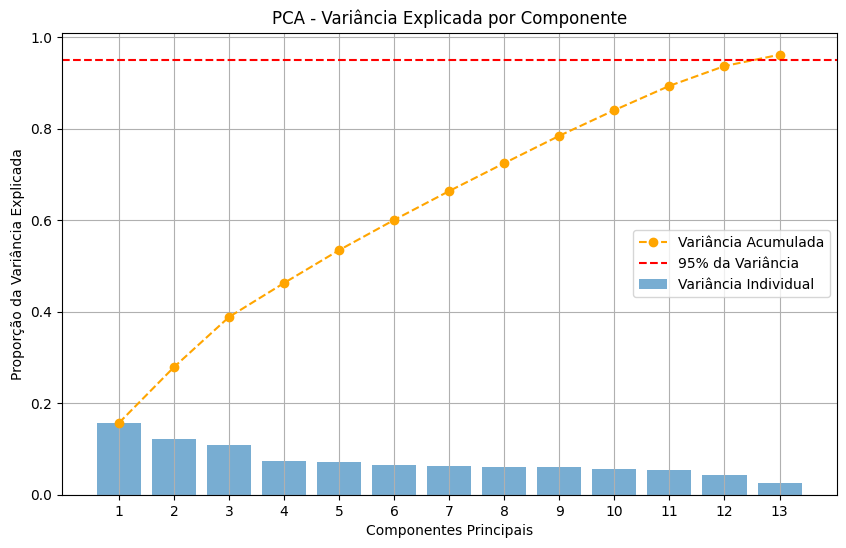

In [49]:
# Aplicando PCA corretamente após a padronização
X_treino_pca, X_teste_pca, modelo_pca = aplicar_pca(X_treino_scaled_df, X_teste_scaled_df)

## 7️⃣ Seleção e Modelagem (algoritmos candidatos)

**Modelos escolhidos para teste inicial**:
- Regressão Logística ✅ (simples, interpretável e base de comparação)
- Árvore de Decisão ✅ (bom para identificar variáveis mais importantes)
- Random Forest ✅ (modelo robusto e eficiente)
- XGBoost ✅ (ótimo para classificação e geralmente apresenta bons resultados)

In [50]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 2.4 MB/s eta 0:00:00


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# --- DEFINIÇÃO DOS MODELOS ---
def criar_modelos():
    """
    Retorna um dicionário contendo os modelos de classificação candidatos.
    """
    return {
        'Regressão Logística': LogisticRegression(random_state=SEED),
        'Árvore de Decisão': DecisionTreeClassifier(random_state=SEED),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=SEED),
        'XGBoost': XGBClassifier(eval_metric='logloss', random_state=SEED)
    }

### Treinamento e Avaliação de Modelos

In [52]:
# --- FUNÇÃO PARA TREINAMENTO E AVALIAÇÃO ---
def treinar_e_avaliar_modelos_cv(X, y, cv=10):
    """
    Treina e avalia múltiplos modelos de classificação usando validação cruzada (Stratified K-Fold).

    Parâmetros:
    ----------
    X : array-like
        Features do conjunto de dados utilizado para treino e validação.

    y : array-like
        Variável alvo do conjunto de dados.

    cv : int, opcional (padrão=10)
        Número de divisões (folds) para a validação cruzada.

    Retorna:
    -------
    df_resultados : DataFrame
        DataFrame com as médias das métricas de desempenho (Acurácia, Precisão,
        Recall, F1-Score, AUC-ROC) obtidas através da validação cruzada para cada modelo.
        Os modelos são ordenados de forma decrescente pelo valor da AUC-ROC.

    Exemplo de uso:
    ---------------
    >>> df_metricas = treinar_e_avaliar_modelos_cv(X_treino, y_treino, cv=5)
    >>> display(df_metricas)

    Observações:
    ------------
    - Utiliza Stratified K-Fold Cross-Validation para garantir que as proporções
      das classes sejam mantidas em cada divisão.
    - Avalia modelos definidos externamente pela função criar_modelos().
    - As métricas calculadas são:
        - Acurácia (accuracy)
        - Precisão (precision)
        - Recall (recall)
        - F1-Score (f1)
        - Área sob a curva ROC (roc_auc)
    """
    modelos = criar_modelos()
    resultados = {}

    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=SEED)

    for nome, modelo in modelos.items():
        print(f"\n🚀 Avaliando modelo: {nome} com Stratified K-Fold Cross-Validation...")

        acuracia = cross_val_score(modelo, X, y, cv=skf, scoring='accuracy').mean()
        precisao = cross_val_score(modelo, X, y, cv=skf, scoring='precision').mean()
        recall = cross_val_score(modelo, X, y, cv=skf, scoring='recall').mean()
        f1 = cross_val_score(modelo, X, y, cv=skf, scoring='f1').mean()
        auc = cross_val_score(modelo, X, y, cv=skf, scoring='roc_auc').mean()

        resultados[nome] = {
            'Acurácia': round(acuracia, 4),
            'Precisão': round(precisao, 4),
            'Recall': round(recall, 4),
            'F1-Score': round(f1, 4),
            'AUC-ROC': round(auc, 4)
        }

    df_resultados = pd.DataFrame(resultados).T.sort_values(by='AUC-ROC', ascending=False)

    print("\n📌 Avaliação com validação cruzada concluída!")
    return df_resultados

In [53]:
# Aplicação validação cruzada no conjunto completo de treino (após pré-processamento e padronização)
df_resultados_cv = treinar_e_avaliar_modelos_cv(X_treino_scaled_df, y_treino_resampled, cv=10)


🚀 Avaliando modelo: Regressão Logística com Stratified K-Fold Cross-Validation...

🚀 Avaliando modelo: Árvore de Decisão com Stratified K-Fold Cross-Validation...

🚀 Avaliando modelo: Random Forest com Stratified K-Fold Cross-Validation...

🚀 Avaliando modelo: XGBoost com Stratified K-Fold Cross-Validation...

📌 Avaliação com validação cruzada concluída!


In [54]:
# Exibição dos resultados
display(df_resultados_cv)

,Acurácia,Precisão,Recall,F1-Score,AUC-ROC
XGBoost,0.9690,0.9721,0.9637,0.9678,0.9964
Random Forest,0.9673,0.9695,0.9665,0.9676,0.9957
Árvore de Decisão,0.9390,0.9371,0.9369,0.9382,0.9365
Regressão Logística,0.8442,0.8307,0.8634,0.8476,0.9197


## 8️⃣ Otimização do XGBoost com GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

# --- FUNÇÃO PARA OTIMIZAÇÃO DO XGBOOST COM GRIDSEARCH ---
def otimizar_xgboost_grid(X_treino, y_treino, cv=10, scoring='recall'):
    """
    Realiza a busca por hiperparâmetros ótimos para XGBoost usando GridSearchCV.

    Parâmetros:
    - X_treino: Conjunto de treino.
    - y_treino: Labels de treino.
    - cv: Número de folds para validação cruzada (padrão: 10).
    - scoring: Métrica de avaliação (padrão: 'recall').

    Retorna:
    - Melhor conjunto de hiperparâmetros encontrados.
    """
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 9],
        'subsample': [0.7, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2]
    }

    xgb = XGBClassifier(eval_metric='logloss', random_state=SEED)

    grid_search = GridSearchCV(
        xgb, param_grid=param_grid, scoring=scoring,
        cv=cv, verbose=1, n_jobs=-1
    )

    grid_search.fit(X_treino, y_treino)

    print("\n✅ Melhor combinação de hiperparâmetros:", grid_search.best_params_)
    return grid_search.best_params_

In [56]:
# Executando otimização do XGBoost com GridSearchCV
melhores_hiperparametros = otimizar_xgboost_grid(X_treino_scaled, y_treino_resampled)

Fitting 10 folds for each of 729 candidates, totalling 7290 fits

✅ Melhor combinação de hiperparâmetros: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300, 'subsample': 0.9}


## Treinando o modelo com os melhores hiperparâmetros

In [57]:
# Criando modelo otimizado
melhores_hiperparametros = {chave: valor[0] if isinstance(valor, list) else valor
                            for chave, valor in melhores_hiperparametros.items()}

melhor_xgb_final = XGBClassifier(
    **melhores_hiperparametros,
    eval_metric='logloss',
    random_state=SEED
)

# Treinando o modelo final
melhor_xgb_final.fit(X_treino_scaled, y_treino_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

### Avaliando o desempenho do modelo otimizado

In [58]:
def exibir_metricas_modelo(y_real, y_pred, y_proba):
    """
    Exibe as métricas detalhadas do modelo em uma tabela estilizada com destaque para o Recall.

    Parâmetros:
    - y_real: Valores reais do conjunto de teste.
    - y_pred: Valores previstos pelo modelo.
    - y_proba: Probabilidades previstas pelo modelo para classe positiva.
    """
    report = classification_report(y_real, y_pred, output_dict=True)
    auc = roc_auc_score(y_real, y_proba)

    metricas = {
        'Acurácia': round(report['accuracy'], 4),
        'Precisão': round(report['1']['precision'], 4),
        'Recall': round(report['1']['recall'], 4),  # 🔹 Destacar essa métrica!
        'F1-Score': round(report['1']['f1-score'], 4),
        'AUC-ROC': round(auc, 4)
    }

    df_metricas = pd.DataFrame(metricas, index=['Modelo Otimizado']).T

    # Configurando o estilo do Seaborn
    sns.set_theme(style="whitegrid")

    # Criando uma tabela estilizada
    fig, ax = plt.subplots(figsize=(12, 2))
    ax.axis('tight')
    ax.axis('off')

    tabela = ax.table(cellText=df_metricas.values,
                      colLabels=df_metricas.columns,
                      rowLabels=df_metricas.index,
                      cellLoc="center",
                      loc="center",
                      bbox=[0, 0, 1, 1])  # Ajuste para ocupar toda a área da figura

    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1.2, 1.2)  # Ajuste no tamanho da tabela

    # 🔹 Identificar a linha do Recall
    recall_index = list(df_metricas.index).index("Recall") + 1  # +1 porque a primeira linha é o cabeçalho

    # 🔹 Destacar a célula do Recall (fundo colorido e borda)
    tabela[(recall_index, 0)].set_facecolor("#A6C9DE")  # Cor para destaque
    tabela[(recall_index, 0)].set_edgecolor("black")
    tabela[(recall_index, 0)].set_linewidth(1)  # Borda mais grossa para chamar atenção

    plt.show()

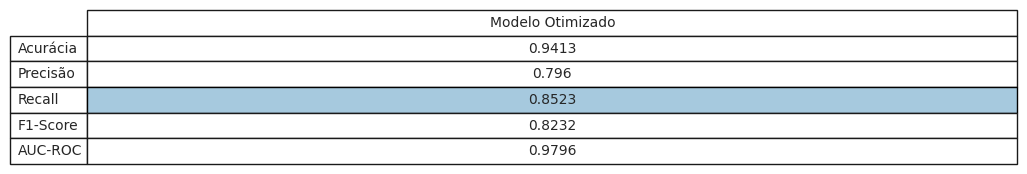

In [59]:
# 🔹 Fazendo previsões no conjunto de teste
y_pred_final = melhor_xgb_final.predict(X_teste_scaled)
y_proba_final = melhor_xgb_final.predict_proba(X_teste_scaled)[:, 1]

# 🔹 Exibir Avaliação no Teste
exibir_metricas_modelo(y_teste, y_pred_final, y_proba_final)

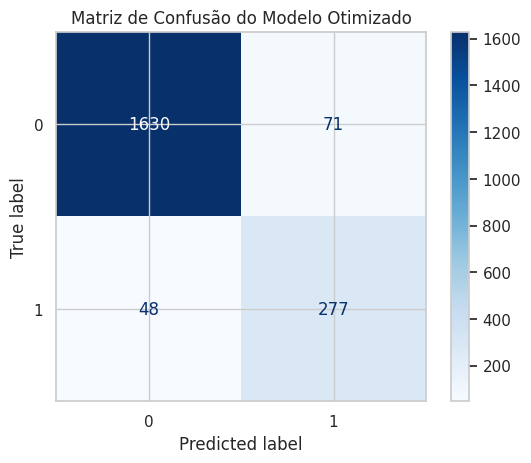

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- MATRIZ DE CONFUSÃO ---
def exibir_matriz_confusao(y_teste, y_pred):
    """
    Exibe a matriz de confusão formatada.

    Parâmetros:
    - y_teste: Valores reais.
    - y_pred: Previsões do modelo.
    """
    cm = confusion_matrix(y_teste, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Matriz de Confusão do Modelo Otimizado")
    plt.show()

# 🔹 Exibir Matriz de Confusão
exibir_matriz_confusao(y_teste, y_pred_final)

> O modelo tem boa precisão na classificação de clientes adimplentes. Ainda há falsos negativos (inadimplentes classificados como adimplentes), **o que pode ser um problema em estratégias de crédito**.

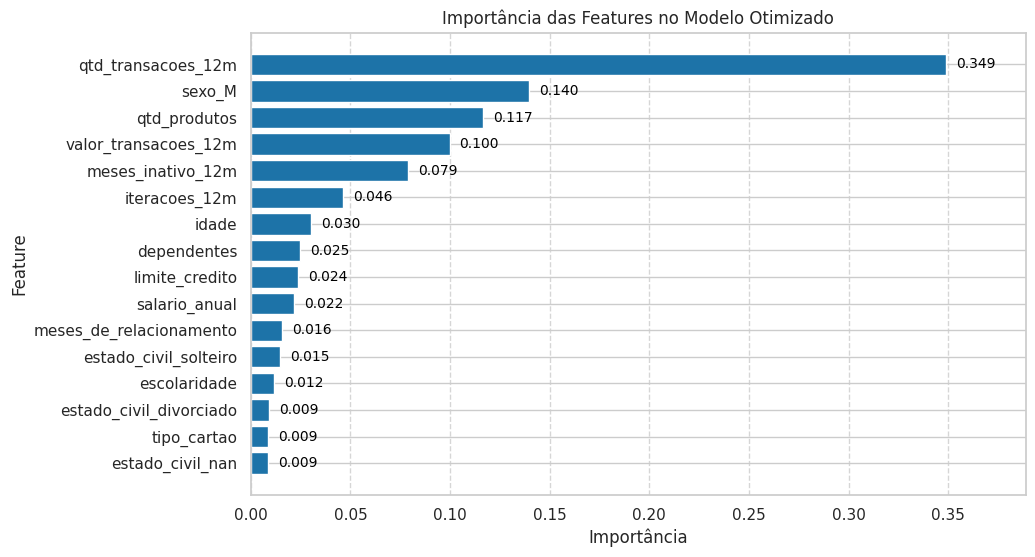

In [61]:
# --- IMPORTÂNCIA DAS FEATURES ---
def plot_importancia_features(modelo, features):
    """
    Plota a importância das features de um modelo treinado.

    Parâmetros:
    - modelo: Modelo treinado do XGBoost.
    - features: Lista com os nomes das features.
    """
    importances = modelo.feature_importances_
    indices = np.argsort(importances)[::-1]  # Ordena do maior para o menor
    features_sorted = np.array(features)[indices]  # Garantir alinhamento

    plt.figure(figsize=(10, 6))
    bars = plt.barh(features_sorted, importances[indices], color='#1D73A8')

    for bar, importance in zip(bars, importances[indices]):
        plt.text(bar.get_width() + 0.005,  # Ajusta para manter legível
                 bar.get_y() + bar.get_height()/2,
                 f"{importance:.3f}",
                 va='center', ha='left', fontsize=10, color='black')

    plt.grid(axis='x', linestyle='--', alpha=0.8)
    plt.xlabel("Importância")
    plt.ylabel("Feature")
    plt.title("Importância das Features no Modelo Otimizado")
    plt.xlim(0, max(importances) + 0.04)
    plt.gca().invert_yaxis()  # Inverter ordem para destacar as mais importantes
    plt.show()

# 📌 Executando a função
plot_importancia_features(melhor_xgb_final, X_treino.columns.tolist())

> O comportamento transacional (quantidade e valor de transações) tem um peso maior do que características demográficas (como salário e escolaridade).

> 🔍 Isso sugere que estratégias baseadas no comportamento financeiro recente podem ser mais eficazes para prever inadimplência do que apenas dados cadastrais.

## Feature Engineering com WOE (Weight of Evidence)

In [62]:
# Recordando o dataframe das features (teste)
X_teste

,idade,dependentes,escolaridade,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,estado_civil_divorciado,estado_civil_nan,estado_civil_solteiro,sexo_M
8566,59,0.0,1.0,3.0,1,48,2.0,2.0,6.0,13172.76,2598.07,47,0,1,0,1
3283,55,2.0,4.0,5.0,1,36,5.0,2.0,2.0,12856.95,3364.96,61,0,0,1,1
357,49,3.0,1.0,3.0,1,32,3.0,2.0,2.0,18584.78,1330.66,34,0,0,1,1
2740,39,4.0,5.0,1.0,1,22,3.0,1.0,3.0,5454.89,2674.21,67,0,0,0,0
5619,41,1.0,5.0,1.0,1,30,3.0,1.0,3.0,2029.03,3142.30,37,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9512,42,4.0,4.0,2.0,1,36,1.0,2.0,1.0,6128.96,13505.03,116,0,0,1,1
1919,47,3.0,2.0,2.0,1,43,4.0,2.0,3.0,13473.25,1593.98,46,0,0,0,0
3046,55,2.0,4.0,4.0,2,36,5.0,1.0,1.0,34516.19,3542.86,60,0,0,1,1
5415,39,2.0,4.0,1.0,1,27,1.0,3.0,3.0,1438.08,2336.55,46,0,0,1,0


In [63]:
# 1. Média valor por transação
def calcular_media_valor_transacao(df):
    """
    Calcula a média do valor por transação.

    Parâmetros:
    df (DataFrame): DataFrame contendo 'valor_transacoes_12m' e 'qtd_transacoes_12m'.

    Retorno:
    DataFrame atualizado com a coluna 'media_valor_transacao'.
    """
    df = df.copy()
    df['media_valor_transacao'] = df['valor_transacoes_12m'] / df['qtd_transacoes_12m'].replace(0, np.nan)
    df['media_valor_transacao'] = df['media_valor_transacao'].fillna(0)
    return df

In [64]:
# 2. Uso do limite de crédito
def calcular_utilizacao_limite_credito(df):
    """
    Calcula a taxa de uso do limite de crédito.

    Parâmetros:
    df (DataFrame): DataFrame contendo 'valor_transacoes_12m' e 'limite_credito'.

    Retorno:
    DataFrame atualizado com a coluna 'utilizacao_limite_credito'.
    """
    df = df.copy()
    df['utilizacao_limite_credito'] = df['valor_transacoes_12m'] / df['limite_credito'].replace(0, np.nan)
    return df

In [65]:
# 3. Intensidade das interações nos meses ativos
def intensidade_interacoes(df):
    """
    Calcula a intensidade das interações nos meses ativos.

    Fórmula:
    Intensidade = interações_12m / (12 - meses_inativo_12m)

    Parâmetros:
    df (DataFrame): DataFrame contendo as colunas 'iteracoes_12m' e 'meses_inativo_12m'.

    Retorno:
    DataFrame atualizado com a coluna 'intensidade_interacoes'.
    """
    df = df.copy()

    # Evitar divisão por zero e tratar NaNs
    df['intensidade_interacoes'] = df['iteracoes_12m'] / (12 - df['meses_inativo_12m']).replace({0: np.nan})
    df['intensidade_interacoes'] = df['intensidade_interacoes'].fillna(0)

    return df

In [66]:
# Aplicação nas bases de treino e teste
X_treino_fe = calcular_media_valor_transacao(X_treino)
X_teste_fe = calcular_media_valor_transacao(X_teste)

X_treino_fe = calcular_utilizacao_limite_credito(X_treino_fe)
X_teste_fe = calcular_utilizacao_limite_credito(X_teste_fe)

X_treino_fe = intensidade_interacoes(X_treino_fe)
X_teste_fe = intensidade_interacoes(X_teste_fe)

In [67]:
X_treino_fe

,idade,dependentes,escolaridade,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m,estado_civil_divorciado,estado_civil_nan,estado_civil_solteiro,sexo_M,media_valor_transacao,utilizacao_limite_credito,intensidade_interacoes
2138,26,0.0,2.0,1.0,1,36,6.0,3.0,3.0,2735.93,2441.92,58,0,0,1,1,42.102069,0.892537,0.333333
7834,38,1.0,4.0,4.0,1,29,3.0,3.0,3.0,2155.98,3781.00,61,0,0,1,1,61.983607,1.753727,0.333333
8360,45,4.0,5.0,3.0,1,37,1.0,2.0,2.0,13093.37,2032.63,39,0,0,0,1,52.118718,0.155241,0.200000
8211,43,2.0,4.0,1.0,1,36,1.0,2.0,2.0,3226.14,5066.74,75,0,0,1,0,67.556533,1.570527,0.200000
2796,48,4.0,5.0,3.0,2,38,3.0,2.0,2.0,32658.95,2023.45,37,0,1,0,1,54.687838,0.061957,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,49,0.0,5.0,1.0,1,37,5.0,3.0,2.0,1749.92,2510.15,38,0,1,0,0,66.056579,1.434437,0.300000
5851,42,4.0,4.0,1.0,1,36,5.0,3.0,2.0,2128.62,2289.11,41,0,0,0,0,55.831951,1.075396,0.300000
1205,26,0.0,3.0,1.0,1,13,4.0,4.0,2.0,2063.07,2602.10,42,0,0,1,0,61.954762,1.261276,0.400000
8744,43,3.0,3.0,1.0,2,34,4.0,2.0,2.0,11362.71,7849.02,88,0,0,0,0,89.193409,0.690770,0.200000


## Aplicação da modelagem após a criação de novas colunas

In [68]:
X_treino_resampled_fe, y_treino_fe = aplicar_smote(X_treino_fe, y_treino)

✅ SMOTE aplicado: 8101 → 13598 amostras


In [69]:
imputer = SimpleImputer(strategy='median')  # Preenche NaNs com a média das colunas
X_treino_resampled_fe = pd.DataFrame(imputer.fit_transform(X_treino_resampled_fe), columns=X_treino_resampled_fe.columns)

In [70]:
# Aplicando padronização
X_treino_scaled_fe, X_teste_scaled_fe, scaler_fe = padronizar_dados(X_treino_resampled_fe, X_teste_fe)


✅ Padronização concluída.


In [71]:
# Aplicação validação cruzada no conjunto completo de treino (após pré-processamento e padronização)
df_resultados_cv_fe = treinar_e_avaliar_modelos_cv(X_treino_scaled_fe, y_treino_fe, cv=10)


🚀 Avaliando modelo: Regressão Logística com Stratified K-Fold Cross-Validation...

🚀 Avaliando modelo: Árvore de Decisão com Stratified K-Fold Cross-Validation...

🚀 Avaliando modelo: Random Forest com Stratified K-Fold Cross-Validation...

🚀 Avaliando modelo: XGBoost com Stratified K-Fold Cross-Validation...

📌 Avaliação com validação cruzada concluída!


In [72]:
# Exibição dos resultados
display(df_resultados_cv_fe)

,Acurácia,Precisão,Recall,F1-Score,AUC-ROC
XGBoost,0.9688,0.9712,0.9678,0.9697,0.9964
Random Forest,0.9688,0.9656,0.9701,0.9696,0.9959
Árvore de Decisão,0.9382,0.9328,0.9462,0.9377,0.9396
Regressão Logística,0.8645,0.8539,0.8784,0.8658,0.9337


In [73]:
# Executando a otimização do XGBoost após Feature Engineering
melhores_hiperparametros_fe = otimizar_xgboost_grid(X_treino_scaled_fe, y_treino_fe)

Fitting 10 folds for each of 729 candidates, totalling 7290 fits

✅ Melhor combinação de hiperparâmetros: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.9}


In [74]:
# Aplicando o modelo otimizado após Feature Engineering
melhor_xgb_final_fe = XGBClassifier(
    **melhores_hiperparametros_fe,
    eval_metric='logloss',
    random_state=SEED
)

# Treinando o modelo final após Feature Engineering
melhor_xgb_final_fe.fit(X_treino_scaled_fe, y_treino_fe)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [75]:
# Fazendo previsões no conjunto de teste após Feature Engineering
y_pred_final_fe = melhor_xgb_final_fe.predict(X_teste_scaled_fe)
y_proba_final_fe = melhor_xgb_final_fe.predict_proba(X_teste_scaled_fe)[:, 1]

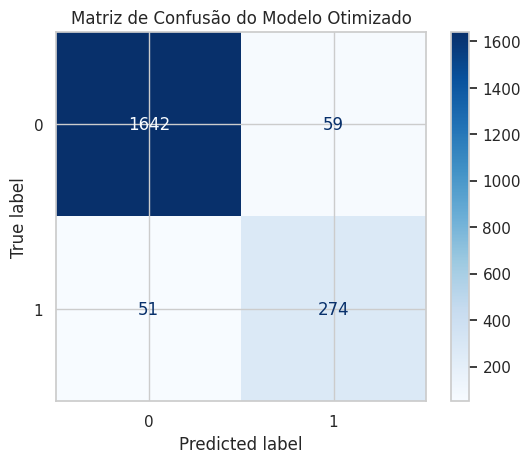

In [76]:
# Exibir Matriz de Confusão após Feature Engineering
exibir_matriz_confusao(y_teste, y_pred_final_fe)

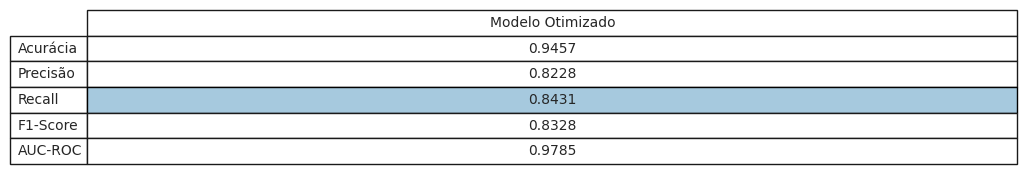

In [77]:
# Exibir métricas detalhadas do modelo otimizado após Feature Engineering
exibir_metricas_modelo(y_teste, y_pred_final_fe, y_proba_final_fe)

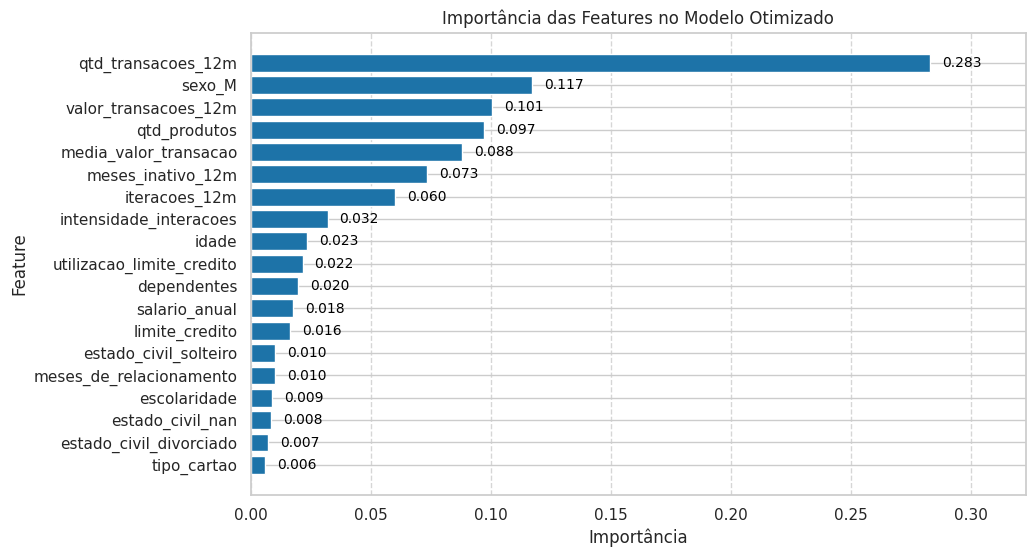

In [78]:
# Exibir Importância das Features após Feature Engineering
plot_importancia_features(melhor_xgb_final_fe, X_treino_fe.columns)